# Statitics 

# Notes

Hey, her er en liste med ting du skal gjøre
1. laste inn stat
2. laste inn data
3. behandle data så det kan brukes
4. endre modelene så de tar inn den samme dataen, men kan endre det internt
5. printe stat som en tabel
6. lage fine plots for veilederne
7. skrive, skrive masse!

In [1]:
# import relevant modules
from My_tools import StudyEstimators as SE
from My_tools import DataFileLoader as DFL

import numpy as np
import pickle as pk
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from tensorflow import keras
import tensorflow as tf

ROOT = "../../"

LATEX_PATH = ROOT + "oppgaven/master_thesis/"
LATEX_TABLE_PATH = LATEX_PATH + "tables/"
LATEX_FIGURE_PATH = LATEX_PATH + "figures/"

RESULT_PATH = ROOT + "results/"

DATA_PATH = ROOT + "data/"
PLOT_PATH = RESULT_PATH + "plots/"
TABLE_PATH = RESULT_PATH + "tables/"
OTHER_PATH = RESULT_PATH + "other/"

METADATA_PRELOAD_DATA_PATH = OTHER_PATH + "bin_data/"

DATA_INFO = DATA_PATH + "info/"
DATA_INFO_NIBIO_FILE = DATA_INFO  + "lmt.nibio.csv"
DATA_INFO_FROST_FILE = DATA_INFO + "Frost_stations.csv"
DATA_INFO_NIBIO2FROST_FILE = DATA_INFO + "StationIDInfo.csv"
DATA_FILE_SOIL_STATIONS = DATA_INFO + "'Stasjonsliste jordtemperatur modellering.xlsx'"

DATA_COLLECTION = DATA_PATH + "raw_data/"
DATA_COLLECTION_STAT = DATA_COLLECTION + "Veret paa Aas 2013- 2017/" # pattern -> 'Veret paa Aas 2013- 2017/Veret paa Aas {YYYY}.pdf'
DATA_COLLECTION_TIME = DATA_COLLECTION + "Time 2013- 2023/" # pattern -> Time{YYYY}.xlsx
DATA_COLLECTION_NIBIO = DATA_COLLECTION + "nibio/" # pattern -> weather_data_hour_stID{id}_y{year}.csv
DATA_COLLECTION_MET = DATA_COLLECTION + "MET/" # pattern -> StationTo_{id}_FROM_{FrostID}.csv

# ID definitions
station_names = pd.read_csv(DATA_INFO_NIBIO_FILE,
                          header=0,
                          index_col = "ID")

nibio_id = {
    "Innlandet" : ["11","17","26","27"],
    "Trøndelag" : ["15","57","34","39"],
    "Østfold" : ["37","41","52","118"],
    "Vestfold" : ["30","38","42","50"] # Fjern "50" for å se om bedre resultat
}
water_st = {}
#"11":   r"\cellcolor{blue!25}",
#"17":	r"\cellcolor{blue!25}",
#"18":	r"\cellcolor{blue!25}",
#"26":	r"\cellcolor{blue!25}",
#"27":	r"\cellcolor{red!25}",
#"14":	r"\cellcolor{green!25}",
#"29":	r"\cellcolor{blue!25}",
#"32":	r"\cellcolor{green!25}",
#"48":	r"\cellcolor{blue!25}",
#"15":	r"\cellcolor{blue!25}",
#"57":	r"\cellcolor{red!25}",
#"34":	r"\cellcolor{blue!25}",
#"39":	r"\cellcolor{red!25}",
#"43":	r"\cellcolor{red!25}",
#"30":	r"\cellcolor{red!25}",
#"38":	r"\cellcolor{red!25}",
#"42":	r"\cellcolor{red!25}",
#"50":	r"\cellcolor{blue!25}",
#"37":	r"\cellcolor{red!25}",
#"41":	r"\cellcolor{blue!25}",
#"52":	r"\cellcolor{red!25}",
#"118":	r"\cellcolor{red!25}",
#"5":	r"\cellcolor{red!25}"
#}

# selv-drenerende = 1 , mettet = 2
soil_type = {
"11":   1,
"17":	1,
"18":	1,
"26":	1,
"27":	2,
"14":	0,
"29":	1,
"32":	0,
"48":	1,
"15":	1,
"57":	2,
"34":	1,
"39":	2,
"43":	2,
"30":	2,
"38":	2,
"42":	2,
"50":	1,
"37":	2,
"41":	1,
"52":	2,
"118":	2,
"5":	2
}

In [2]:
test_data = pk.load(open(METADATA_PRELOAD_DATA_PATH + "KerasBiLSTM_stat_20.bin","br"))

In [17]:
import os.path

name_files = [
    "lin_stat_10.bin",
    "lin_stat_20.bin",
    "Plauborg_day_stat_10.bin",
    "Plauborg_day_stat_20.bin",
    "Plauborg_stat_10.bin",
    "Plauborg_stat_20.bin",
#    "KerasBiLSTM_stat_10.bin",
#    "KerasBiLSTM_stat_20.bin",
]

def own_scorer(estiamtor,X,y):
    pass


model2name = {
#    "lin_stat_10":"Linear model 10cm",
#    "lin_stat_20":"Linear model 20cm",
    "lin_stat_10":"Linear model 10cm",
    "lin_stat_20":"Linear model 20cm",
    "Plauborg_day_stat_10":"Plauborg model (daily values) 10cm",
    "Plauborg_day_stat_20":"Plauborg model (daily values) 20cm",
#    "Plauborg_daily_stat_10":"Plauborg model (daily values) 10cm",
#    "Plauborg_daily_stat_20":"Plauborg model (daily values) 20cm",
    "Plauborg_stat_10":"Plauborg model (hourly values) 10cm",
    "Plauborg_stat_20":"Plauborg model (hourly values) 20cm",
    "l1KerasBiLSTM_stat_10":"BiLSTM 10cm",
    "l1KerasBiLSTM_stat_20":"BiLSTM 20cm",
#    "l2KerasBiLSTM_stat_10":"LSTM 10cm",
#    "l2KerasBiLSTM_stat_20":"LSTM 20cm",
#    "KerasGRU_stat_20":"GRU 20cm",
#    "KerasGRU_stat_10":"GRU 10cm",
#    "KerasBiGRU_stat_20":"BiGRU 20cm",
#    "KerasBiGRU_stat_10":"BiGRU 10cm",
#    "KerasBiLSTM_stat_10":"Multi layer Bi/LSTM 10cm",
#    "KerasBiLSTM_stat_20":"Multi layer Bi/LSTM 20cm",
    "lin_reg_1d_stat_10":"Linear model 10cm 1-day",
    "lin_reg_1d_stat_20":"Linear model 20cm 1-day",
    "l1KerasBiLSTM_Ntime_stat_10":"BiLSTM 10cm no-time",
    "l1KerasBiLSTM_Ntime_stat_20":"BiLSTM 20cm no-time",
#    "l2KerasBiLSTM_Ntime_stat_1":"LSTM 10cm no-time",
#    "l2KerasBiLSTM_Ntime_stat_2":"LSTM 20cm no-time",
#    "KerasGRU_Ntime_stat_2":"GRU 20cm no-time",
#    "KerasGRU_Ntime_stat_1":"GRU 10cm no-time",
#    "KerasBiGRU_Ntime_stat_2":"BiGRU 20cm no-time",
#    "KerasBiGRU_Ntime_stat_1":"BiGRU 10cm no-time",
#    "KerasBiLSTM_Ntime_stat_1":"Multi layer Bi/LSTM 10cm no-time",
#    "KerasBiLSTM_Ntime_stat_2":"Multi layer Bi/LSTM 20cm no-time",
}

spesial_files = list(model2name.keys())


available_stat = []
for fn in name_files:
    if os.path.isfile(fname := METADATA_PRELOAD_DATA_PATH + fn):
        data = pk.load(open(fname,"br"))
        available_stat.append( ( fn[:-4] ,data)  )

available_stat = dict(available_stat)
test_data = dict()
for sf in spesial_files:
    print(sf)
    #if not(os.path.isfile(METADATA_PRELOAD_DATA_PATH + sf + ".bin")):
    #    continue
    data = pk.load(open(METADATA_PRELOAD_DATA_PATH + sf + ".bin","br"))
    #new_model = tf.keras.models.load_model(METADATA_PRELOAD_DATA_PATH + sf + ".keras")
    #data[sf]["global"]["model"].best_estimator_.model = new_model
    test_data.update(data)

lin_stat_10
lin_stat_20
Plauborg_day_stat_10
Plauborg_day_stat_20
Plauborg_stat_10
Plauborg_stat_20
l1KerasBiLSTM_stat_10
l1KerasBiLSTM_stat_20
lin_reg_1d_stat_10
lin_reg_1d_stat_20
l1KerasBiLSTM_Ntime_stat_10
l1KerasBiLSTM_Ntime_stat_20


In [18]:
print(test_data["Plauborg_day_stat_20"]["global"]["model"].best_params_)
print(test_data["Plauborg_day_stat_20"]["global"])

KeyError: 'Plauborg_day_stat_20'

In [19]:
test_data

{'lin_reg_stat_10': {'global': {'SSE': 2290375.6509007285,
   'SAE': 503251.3127787778,
   'bias': -0.7376252661489736,
   'SST': 5387371.096041623,
   'n': 173800,
   'log_cond': 5.351274978693111e-14,
   'digit_sense': -1,
   'R^2': 0.5748620969170688,
   'MSE': 13.178225839474848,
   'MAE': 2.895577173640839,
   'pros_acc': 0.10592059838895282,
   'RMSE': 3.6301826179236283,
   'adj R^2': 0.5748572045667626,
   'model': GridSearchCV(estimator=MultiLinearRegresson(), n_jobs=2,
                param_grid={'fit_intercept': [False, True],
                            'lag_max': range(0, 96, 6)},
                pre_dispatch=2, scoring=<function own_scorer at 0x7efe33197b80>),
   'best_params': {'fit_intercept': False, 'lag_max': 0}},
  'region': {'Østfold': {'SSE': 638789.6099298067,
    'SAE': 129368.3415712948,
    'bias': -0.8738804948154965,
    'SST': 1362044.4022799414,
    'n': 41717,
    'log_cond': 3.5749181392929403e-14,
    'digit_sense': -1,
    'R^2': 0.5310067653737796,
   

In [5]:
data = DFL.DataFileLoader().load(METADATA_PRELOAD_DATA_PATH + "weatherdata_cleaned.bin")
data._update_leafs()

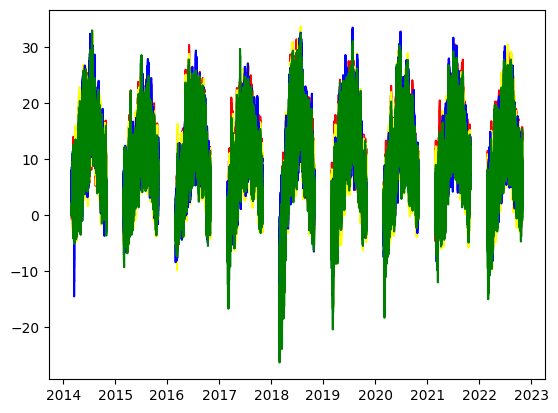

In [6]:
name_list = {"Innlandet":"green","Trøndelag":"blue","Østfold":"yellow","Vestfold":"red"}
for key,yr in data:
    #print(key)
    plt.plot(yr.Time,yr.TM,label = key[0],color=name_list[key[0]])
plt.show()

In [8]:
import tabulate as tb
standard_head = [
    ["mean","max"],
    ["std","min"]
]
tables_air = dict()
tables_tjm10 = dict()
tables_tjm20 = dict()
station_data = dict()
for k,d in data:
    #print([
    #    [d["TM"].mean(),d["TM"].max()],
    #    [d["TM"].std(),d["TM"].min()]
    #])
    if k[1] in station_data:
        station_data[k[1]] = pd.concat([station_data[k[1]],d],axis=0,ignore_index=True)
    else:
        station_data[k[1]] = d
    tables_air[tuple(k[1:])] = tb.tabulate([
        ["$\mu$:"+str(np.round(d["TM"].mean(),2)),"max:"+str(np.round(d["TM"].max(),2))],
        ["$\sigma$:"+str(np.round(d["TM"].std(),2)),"min:"+str(np.round(d["TM"].min(),2))]
    ],tablefmt="latex_raw")
    tables_tjm10[tuple(k[1:])] = tb.tabulate([
        ["$\mu$:"+str(np.round(d["TJM10"].mean(),2)),"max:"+str(np.round(d["TJM10"].max(),2))],
        ["$\sigma$:"+str(np.round(d["TJM10"].std(),2)),"min:"+str(np.round(d["TJM10"].min(),2))]
    ],tablefmt="latex_raw")
    tables_tjm20[tuple(k[1:])] = tb.tabulate([
        ["$\mu$:"+str(np.round(d["TJM20"].mean(),2)),"max:"+str(np.round(d["TJM20"].max(),2))],
        ["$\sigma$:"+str(np.round(d["TJM20"].std(),2)),"min:"+str(np.round(d["TJM20"].min(),2))]
    ],tablefmt="latex_raw")

#print(station_data)
station_stat_total = [["station ID", "TM [℃]","TJM10 [℃]","TJM20 [℃]"]]
for st, value in station_data.items():
    mean = value[["TM","TJM10","TJM20"]].mean(axis=0)
    std = value[["TM","TJM10","TJM20"]].std(axis=0)
    mmax = value[["TM","TJM10","TJM20"]].max(axis=0)
    mmin = value[["TM","TJM10","TJM20"]].min(axis=0)
    #print(mean)
    station_stat_total.append(
        [water_st.get(st,"")+st,
         tb.tabulate(
             [["$\mu$:"+str(np.round(mean["TM"],2)),"max:"+str(mmax["TM"])],["$\sigma$:"+str(np.round(std["TM"],2)),"min:"+str(mmin["TM"])]],
             tablefmt="latex_raw"
         ),
         tb.tabulate(
             [["$\mu$:"+str(np.round(mean["TJM10"],2)),"max:"+str(mmax["TJM10"])],["$\sigma$:"+str(np.round(std["TJM10"],2)),"min:"+str(mmin["TJM10"])]],
             tablefmt="latex_raw"
         ),
         tb.tabulate(
             [["$\mu$:"+str(np.round(mean["TJM20"],2)),"max:"+str(mmax["TJM20"])],["$\sigma$:"+str(np.round(std["TJM20"],2)),"min:"+str(mmin["TJM20"])]],
             tablefmt="latex_raw"
         )
        ]
    )

f = open(LATEX_TABLE_PATH + "station_summary_table_all.tex","w")
f.write(tb.tabulate(station_stat_total,tablefmt="latex_raw",headers="firstrow"))
f.close()

station_ids = set(k[0] for k in tables_air.keys())
station_ids_p1 = list(k for i,k in enumerate(station_ids) if i%4==0)
station_ids_p2 = list(k for i,k in enumerate(station_ids) if i%4==1)
station_ids_p3 = list(k for i,k in enumerate(station_ids) if i%4==2)
station_ids_p4 = list(k for i,k in enumerate(station_ids) if i%4==3)
station_map = {value:key for key,value in enumerate(station_ids)}
#matrix = [["station/year",*[str(yr) for yr in range(2014,2024)]]]
matrix_air_p1 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm10_p1 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm20_p1 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_air_p2 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm10_p2 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm20_p2 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_air_p3 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm10_p3 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm20_p3 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_air_p4 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm10_p4 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
matrix_tjm20_p4 = [[0 for _ in range(len(station_ids)//4)] for k in range(2014,2023)]
for i,st in enumerate(station_ids_p1):
    for yr in range(2014,2023):
        matrix_air_p1[int(yr)-2014][i] = tables_air[(st,str(yr))]
for i,st in enumerate(station_ids_p2):
    for yr in range(2014,2023):
        matrix_air_p2[int(yr)-2014][i] = tables_air[(st,str(yr))]
for i,st in enumerate(station_ids_p3):
    for yr in range(2014,2023):
        matrix_air_p3[int(yr)-2014][i] = tables_air[(st,str(yr))]
for i,st in enumerate(station_ids_p4):
    for yr in range(2014,2023):
        matrix_air_p4[int(yr)-2014][i] = tables_air[(st,str(yr))]

for i,st in enumerate(station_ids_p1):
    for yr in range(2014,2023):
        matrix_tjm10_p1[int(yr)-2014][i] = tables_tjm10[(st,str(yr))]
for i,st in enumerate(station_ids_p2):
    for yr in range(2014,2023):
        matrix_tjm10_p2[int(yr)-2014][i] = tables_tjm10[(st,str(yr))]
for i,st in enumerate(station_ids_p3):
    for yr in range(2014,2023):
        matrix_tjm10_p3[int(yr)-2014][i] = tables_tjm10[(st,str(yr))]
for i,st in enumerate(station_ids_p4):
    for yr in range(2014,2023):
        matrix_tjm10_p4[int(yr)-2014][i] = tables_tjm10[(st,str(yr))]

for i,st in enumerate(station_ids_p1):
    for yr in range(2014,2023):
        matrix_tjm20_p1[int(yr)-2014][i] = tables_tjm20[(st,str(yr))]
for i,st in enumerate(station_ids_p2):
    for yr in range(2014,2023):
        matrix_tjm20_p2[int(yr)-2014][i] = tables_tjm20[(st,str(yr))]
for i,st in enumerate(station_ids_p3):
    for yr in range(2014,2023):
        matrix_tjm20_p3[int(yr)-2014][i] = tables_tjm20[(st,str(yr))]
for i,st in enumerate(station_ids_p4):
    for yr in range(2014,2023):
        matrix_tjm20_p4[int(yr)-2014][i] = tables_tjm20[(st,str(yr))]

#print(tb.tabulate(matrix,tablefmt="latex_raw"))
f = open(LATEX_TABLE_PATH + "station_summary_table_air_p1.tex","w")
f.write(tb.tabulate(matrix_air_p1,tablefmt="latex_raw",headers=["",*station_ids_p1],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm10_p1.tex","w")
f.write(tb.tabulate(matrix_tjm10_p1,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p1],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm20_p1.tex","w")
f.write(tb.tabulate(matrix_tjm20_p1,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p1],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()

f = open(LATEX_TABLE_PATH + "station_summary_table_air_p2.tex","w")
f.write(tb.tabulate(matrix_air_p2,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p2],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm10_p2.tex","w")
f.write(tb.tabulate(matrix_tjm10_p2,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p2],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm20_p2.tex","w")
f.write(tb.tabulate(matrix_tjm20_p2,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p2],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()

f = open(LATEX_TABLE_PATH + "station_summary_table_air_p3.tex","w")
f.write(tb.tabulate(matrix_air_p3,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p3],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm10_p3.tex","w")
f.write(tb.tabulate(matrix_tjm10_p3,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p3],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm20_p3.tex","w")
f.write(tb.tabulate(matrix_tjm20_p3,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p3],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()

f = open(LATEX_TABLE_PATH + "station_summary_table_air_p4.tex","w")
f.write(tb.tabulate(matrix_air_p4,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p4],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm10_p4.tex","w")
f.write(tb.tabulate(matrix_tjm10_p4,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p4],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()
f = open(LATEX_TABLE_PATH + "station_summary_table_tjm20_p4.tex","w")
f.write(tb.tabulate(matrix_tjm20_p4,tablefmt="latex_raw",headers=[tb.tabulate("",tablefmt="latex_raw"),*station_ids_p4],showindex=[str(yr) for yr in range(2014,2023)]))
f.close()

In [7]:
def confidence_ellipse(x, y, ax, n_std=1.0,set_label=False, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    source: https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor,**kwargs)

    if set_label:
        ellipse.set_label("⋌₀ = {}".format(round(min(ell_radius_x,ell_radius_y),2)))

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
def find_non_nan_ranges(df: pd.Series) -> list[tuple[int,int]]:
    """
    Finds the ranges of indexes where rows do not contain NaNs in the DataFrame.
    Assumes there is a 'Time' column with timestamps.

    Args:
        df (pd.DataFrame): Input DataFrame with NaNs.

    Returns:
        list of tuples: List of (start, end) index ranges where rows do not contain NaNs.
    """

    # Initialize variables
    non_nan_ranges = []
    start_idx = None

    # Iterate over rows
    for idx, row in df.items():
        if not(np.isnan(row)):
            # If the row does not contain NaNs
            if start_idx is None:
                # If this is the start of a new range
                start_idx = idx
        else:
            # If the row contains NaNs
            if start_idx is not None:
                # If this is the end of a range
                non_nan_ranges.append((start_idx, idx - 1))
                start_idx = None

    # Check if the last range is still open
    if start_idx is not None:
        non_nan_ranges.append((start_idx, df.index[-1]))

    return non_nan_ranges

def model_prosent_accurasy(y_true,y_pred,epsilon = 0.5):
    """
        calculates the prosentage of the predicted values actually falls within acceptibale range (epsilon)
    """
    diff = (y_pred.flatten() - y_true.flatten()) <= epsilon
    total = diff.sum() / diff.shape[0]
    return total

In [10]:
from numpy.random import uniform
def model_log_condition_number(arr,mod,epsilon = 0.01,iter = 100):
    #data_arr = arr.copy()
    #if "Time" in data_arr.columns and type(data_arr["Time"][0]) is pd.Timestamp:
    #    data_arr["Time"] = arr["Time"].transform({"Time":lambda x: x.day_of_year*24 + x.hour})
    cond_num = 0
    base_pred = mod.predict(arr)
    norm_pred = np.linalg.norm(base_pred)
    norm_arr = np.linalg.norm((arr.drop("Time",axis=1) if "Time" in arr.columns else arr).infer_objects(copy = False))
    delta = np.sqrt(epsilon / len(arr))
    for _ in range(iter):
        delta_arr = uniform(low = -delta,high = delta, size = (len(arr),(arr.shape[1]-1 if arr.shape[1] > 1 else 1),*arr.shape[2:])) 
        norm_delta = np.linalg.norm(delta_arr)
        shifted_arr = (arr.drop("Time",axis=1) if "Time" in arr.columns else arr).infer_objects(copy = False) + delta_arr
        new_pred = mod.predict((pd.concat([arr["Time"],shifted_arr],axis=1) if "Time" in arr.columns else shifted_arr))
        new_cond = norm_arr*np.linalg.norm(new_pred - base_pred)/(norm_pred * norm_delta)
        if new_cond > cond_num:
            cond_num = new_cond
    return np.log(cond_num)

def append_stat_from_stat(y_true,y_pred,x_true,model_stat,model):
    model_stat["log_cond"] = model_log_condition_number(x_true,model,iter = 100)  
    model_stat["digit_sense"] = int(model_stat["log_cond"]) + (1 if int(model_stat["log_cond"]) > 0 else -1)
    model_stat["R^2"] = 1 - model_stat["SSE"]/model_stat["SST"]
    model_stat["MSE"] = model_stat["SSE"] / model_stat["n"]
    model_stat["MAE"] = model_stat["SAE"] / model_stat["n"]
    model_stat["pros_acc"] = model_prosent_accurasy(y_true,y_pred,epsilon = 0.5)
    model_stat["RMSE"] = np.sqrt(model_stat["MSE"])
    model_stat["bias"] = model_stat["bias"] / model_stat["n"]
    model_stat["adj R^2"] = 1 - (model_stat["SSE"]/model_stat["SST"] * (model_stat["n"] - 1)/(model_stat["n"] - 1 - x_true.shape[1]) )
    return model_stat

def stat_model(y_true ,y_pred) -> dict[str,float]: 
    """
        Returns a dict with following statitics
        - SSE
        - SST
        - SAE
        - --R^2--
        - bias
        - n

        unscaled: to unscale the relevant metric by |y| (R^2,bias)
    """
    stats = {
        "SSE": ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64),
        "SAE": np.abs(y_true - y_pred).sum(axis=0, dtype=np.float64),
        "bias": (y_pred - y_true).sum(axis=0, dtype=np.float64),
        "SST": ((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0, dtype=np.float64),
        "n": y_true.shape[0]
    }
    return stats

def calc_stat_from_data(y_true ,x_true,model ,s_model_stat = dict()):
        current_stat = stat_model(y_true,model.predict(x_true))
        for metric in current_stat: 
            s_model_stat.setdefault(metric,0)
            s_model_stat[metric] += current_stat[metric]
        return s_model_stat
    

def recalc_stat(data: DFL.DataFileLoader,features: list[str], target: str, model, exclustion = [], old_model_stat: dict = dict()):
    """
        Assume data is grouped as wanted, the new groups are 'global', region (index 0), station (index 1). Index 2 is the year
    """
    master_stat = {
        "global": dict(),
        "region": dict(),
        "local": dict()
    }
    y_pred = np.array([])
    y_ground = np.array([])
    for path in data:
        if any( x in exclustion for x in path[0] ):
            continue
        #print(path)
        df = path[1]
        df.loc[df[[*features,target]].isna().any(axis=1),[*features,target]] = np.nan
        collected_indexes = []
        for dt in find_non_nan_ranges(path[1][target]):
            collected_indexes.extend(range(dt[0],dt[1]+1))
            y_pred = np.append(y_pred,model.predict(path[1].loc[dt[0]:dt[1],features]))
            y_ground = np.append(y_ground,path[1].loc[dt[0]:dt[1],target])
            master_stat['global'] = calc_stat_from_data(path[1].loc[dt[0]:dt[1],target].to_numpy().flatten(),
                                                        path[1].loc[dt[0]:dt[1],features],
                                                        model,
                                                        master_stat["global"])
            master_stat['region'][path[0][0]] = calc_stat_from_data(path[1].loc[dt[0]:dt[1],target].to_numpy().flatten(),path[1].loc[dt[0]:dt[1],features],model,master_stat['region'].get(path[0][0],dict()))
            master_stat['local'][path[0][1]] = calc_stat_from_data(path[1].loc[dt[0]:dt[1],target].to_numpy().flatten(),path[1].loc[dt[0]:dt[1],features],model,master_stat['local'].get(path[0][1],dict()))
    for scope in master_stat.keys():
        if scope == "global":
            master_stat["global"] = append_stat_from_stat(y_ground,
                                                       y_pred,
                                                       path[1].loc[collected_indexes,features],
                                                       master_stat["global"],
                                                       model
                                                      )
            master_stat["global"]["model"] = model
            continue
        for st in master_stat[scope]:
            master_stat[scope][st] = append_stat_from_stat(y_ground,
                                                       y_pred,
                                                       path[1].loc[collected_indexes,features],
                                                       master_stat[scope][st],
                                                       model
                                                      )
    return master_stat
def hour2day(df):
    hourly_df = df.infer_objects(copy=False).set_index("Time")[["TM","TJM10", "TJM20"]].resample("1D").mean().ffill().reset_index()  # Forward fill missing values
    return hourly_df

In [11]:
feature_list = {
    mod_name : {
        "feature": ["Time","TM"] if "lin" not in mod_name else ["TM"],
        "target": "TJM10" if "10" in mod_name else "TJM20"
    } for mod_name in available_stat
}
model_stat_recalc = {}
for mod_name in available_stat:
    model_stat_recalc[mod_name] = recalc_stat(data[:,:,"2021":"2022"] if "day" not in mod_name else data[:,:,"2021":"2022"].data_transform(hour2day),[*feature_list[mod_name]["feature"]],feature_list[mod_name]["target"],available_stat[mod_name]["global"]["model"])

In [12]:
model_stat_recalc

{'lin_stat_10': {'global': {'SSE': 3110590.142329415,
   'SAE': 567847.4208471065,
   'bias': 2.3029058460444984,
   'SST': 5387371.096041623,
   'n': 173801,
   'log_cond': -0.6379560297072947,
   'digit_sense': -1,
   'R^2': 0.4226144650375162,
   'MSE': 17.89742373363453,
   'MAE': 3.267227581240076,
   'pros_acc': 0.3353432949177508,
   'RMSE': 4.230534686494667,
   'adj R^2': 0.42261114289219337,
   'model': LinearRegression()},
  'region': {'Østfold': {'SSE': 748693.1035593234,
    'SAE': 136820.2218500657,
    'bias': 2.0154764612447993,
    'SST': 1362044.4022799414,
    'n': 41717,
    'log_cond': -0.6379560297072859,
    'digit_sense': -1,
    'R^2': 0.45031666933465786,
    'MSE': 17.946954564310072,
    'MAE': 3.279723418512014,
    'pros_acc': 0.3353432949177508,
    'RMSE': 4.236384610054908,
    'adj R^2': 0.45030349222017463},
   'Vestfold': {'SSE': 844912.0281703294,
    'SAE': 150527.04120275733,
    'bias': 2.01873235465115,
    'SST': 1748142.779383188,
    'n': 461

## Linear regression statestic

In [7]:
#model_stat_recalc = model_stat_recalc | test_data
model_stat_recalc = test_data
model_stat_recalc.pop("global",None)
model_stat_recalc

{'lin_reg_stat_10': {'global': {'SSE': 599050.6636695543,
   'SAE': 245047.48532145057,
   'bias': 0.1380470454158757,
   'SST': 5387371.096041623,
   'n': 173800,
   'log_cond': -1.4121193842138038,
   'digit_sense': -2,
   'R^2': 0.8888046408925296,
   'MSE': 3.4467817242206804,
   'MAE': 1.409939501274169,
   'pros_acc': 0.23532796317606444,
   'RMSE': 1.8565510292530827,
   'adj R^2': 0.8888033612920866,
   'model': GridSearchCV(estimator=MultiLinearRegresson(), n_jobs=-1,
                param_grid={'fit_intercept': [False, True],
                            'lag_max': range(0, 96, 6)}),
   'SAE(reg)': 184088.51752212972},
  'region': {'Østfold': {'SSE': 148293.50123502428,
    'SAE': 60973.455843680924,
    'bias': -0.007786250955407172,
    'SST': 1362044.4022799414,
    'n': 41717,
    'log_cond': -1.4101672095762408,
    'digit_sense': -2,
    'R^2': 0.8911243267937564,
    'MSE': 3.5547498917713227,
    'MAE': 1.4615973306728893,
    'pros_acc': 0.23532796317606444,
    'RMSE

In [24]:
tabular_data = [["model","scope","spesific\nscope","RMSE\n[℃]","MAE [℃]","bias\n[℃]",r"log($\kappa$(model))","digit\nsensitivity","R²"]] # transformed stat to convert, i0 is title, ik ∀k>0 is data
model_table = {
    key:[["scope","spesific\nscope","RMSE\n[℃]","MAE [℃]","bias\n[℃]",r"log($\kappa$(model))","digit\nsensitivity","R²"]] for key in model_stat_recalc.keys()
}
station_ids = list(model_stat_recalc[list(model_stat_recalc.keys())[0]]["local"].keys())

station_table_10cm = [[
    "model",""
] + [water_st.get(s,"")+s for i,s in enumerate(station_ids)] + ["average"]]
station_table_20cm = [[
    "model",""
] + [water_st.get(s,"")+s for i,s in enumerate(station_ids)] + ["average"]]

station_table_20cm_p1 = [[
    "model",""
] + [water_st.get(s,"")+s for i,s in enumerate(station_ids) if i%2==0 ] + ["average"]]
station_table_20cm_p2 = [[
    "model",""
] + [water_st.get(s,"")+s for i,s in enumerate(station_ids) if i%2!=0] + ["average"]]
station_table_10cm_p1 = [[
    "model",""
] + [water_st.get(s,"")+s for i,s in enumerate(station_ids) if i%2==0 ] + ["average"]]
station_table_10cm_p2 = [[
    "model",""
] + [water_st.get(s,"")+s for i,s in enumerate(station_ids) if i%2!=0] + ["average"]]
for model in model_stat_recalc:
    for scope in model_stat_recalc[model]:
        if scope == "global":
            ## same as rest but skip spesiffics, replace with dash
            curr_stat = model_stat_recalc[model][scope]
            appending_stat = [np.round(x,3) if type(x) is not str else x for x in [
                model2name[model],scope,"---",
                curr_stat["RMSE"],
                curr_stat["MAE"],curr_stat["bias"],
                curr_stat["log_cond"],curr_stat["digit_sense"],
                curr_stat["R^2"] # ignores adj-R^2 since large n therefor adj approx 1
            ]]
            tabular_data.append(appending_stat)
            old_list = model_table.get(model,list())
            model_table[model].append(appending_stat[1:])
            continue
        for sscope in model_stat_recalc[model][scope]:
            curr_stat = model_stat_recalc[model][scope][sscope]
            appending_stat = [np.round(x,3) if type(x) is not str else x for x in [
                model2name[model],scope,(water_st.get(sscope,"") if scope == "local" else "") + sscope,
                curr_stat["RMSE"],
                curr_stat["MAE"],curr_stat["bias"],
                curr_stat["log_cond"],curr_stat["digit_sense"],
                curr_stat["R^2"] # ignores adj-R^2 since large n therefor adj approx 1
            ]]
            tabular_data.append(appending_stat)
            old_list = model_table.get(model,list())
            model_table[model].append(appending_stat[1:])
    for messure in ["R^2","MAE","RMSE","bias"]:
        append_list_10cm = []
        append_list_20cm = []
        append_list_10cm_p1 = []
        append_list_10cm_p2 = []
        append_list_20cm_p1 = []
        append_list_20cm_p2 = []
        if messure == "R^2":
            if "_1" in model:
                append_list_10cm.append(model2name[model])
                append_list_10cm_p1.append(model2name[model])
                append_list_10cm_p2.append(model2name[model])
            elif "_2" in model:
                append_list_20cm.append(model2name[model])
                append_list_20cm_p1.append(model2name[model])
                append_list_20cm_p2.append(model2name[model])
        else:
            if "_1" in model:
                append_list_10cm.append("")
                append_list_10cm_p1.append("")
                append_list_10cm_p2.append("")
            elif "_2" in model:
                append_list_20cm.append("")
                append_list_20cm_p1.append("")
                append_list_20cm_p2.append("")
        if "_1" in model:
                append_list_10cm.append(messure if messure != "R^2" else "$R^2$")
                append_list_10cm_p1.append(messure if messure != "R^2" else "$R^2$")
                append_list_10cm_p2.append(messure if messure != "R^2" else "$R^2$")
        elif "_2" in model:
                append_list_20cm.append(messure if messure != "R^2" else "$R^2$")
                append_list_20cm_p1.append(messure if messure != "R^2" else "$R^2$")
                append_list_20cm_p2.append(messure if messure != "R^2" else "$R^2$")
        for i,station in enumerate(station_ids):
            if "_1" in model:
                append_list_10cm.append(np.round(model_stat_recalc[model]["local"][station][messure],2))
            else:
                append_list_20cm.append(np.round(model_stat_recalc[model]["local"][station][messure],2))
            if i%2==0 and "_1" in model:
                append_list_10cm_p1.append(np.round(model_stat_recalc[model]["local"][station][messure],2))
            elif i%2!=0 and "_1" in model:
                append_list_10cm_p2.append(np.round(model_stat_recalc[model]["local"][station][messure],2))
            elif i%2==0 and "_2" in model:
                append_list_20cm_p1.append(np.round(model_stat_recalc[model]["local"][station][messure],2))
            elif i%2!=0 and "_2" in model:
                append_list_20cm_p2.append(np.round(model_stat_recalc[model]["local"][station][messure],2))
        if "_1" in model:
            append_list_10cm.append(np.round(model_stat_recalc[model]["global"][messure],2))
            append_list_10cm_p1.append(np.round(model_stat_recalc[model]["global"][messure],2))
            append_list_10cm_p2.append(np.round(model_stat_recalc[model]["global"][messure],2))
        elif "_2" in model:
            append_list_20cm.append(np.round(model_stat_recalc[model]["global"][messure],2))
            append_list_20cm_p1.append(np.round(model_stat_recalc[model]["global"][messure],2))
            append_list_20cm_p2.append(np.round(model_stat_recalc[model]["global"][messure],2))
        if "_1" in model:
            station_table_10cm.append(append_list_10cm)
            station_table_10cm_p1.append(append_list_10cm_p1)
            station_table_10cm_p2.append(append_list_10cm_p2)
        elif "_2" in model:
            station_table_20cm.append(append_list_20cm)
            station_table_20cm_p1.append(append_list_20cm_p1)
            station_table_20cm_p2.append(append_list_20cm_p2)
    table_file = open(LATEX_TABLE_PATH + "table_{}.tex".format(model),"w")
    table_file.write(tb.tabulate(model_table[model],headers="firstrow",tablefmt = "latex_raw"))
    table_file.close()

table_file = open(LATEX_TABLE_PATH + "station_table_20cm.tex","w")
table_file.write(tb.tabulate(station_table_20cm,headers="firstrow",tablefmt = "latex_raw"))
table_file.close()
table_file = open(LATEX_TABLE_PATH + "station_table_10cm.tex","w")
table_file.write(tb.tabulate(station_table_10cm,headers="firstrow",tablefmt = "latex_raw"))
table_file.close()

table_file = open(LATEX_TABLE_PATH + "station_table_10cm_p1.tex","w")
table_file.write(tb.tabulate(station_table_10cm_p1,headers="firstrow",tablefmt = "latex_raw"))
table_file.close()
table_file = open(LATEX_TABLE_PATH + "station_table_10cm_p2.tex","w")
table_file.write(tb.tabulate(station_table_10cm_p2,headers="firstrow",tablefmt = "latex_raw"))
table_file.close()
table_file = open(LATEX_TABLE_PATH + "station_table_20cm_p1.tex","w")
table_file.write(tb.tabulate(station_table_20cm_p1,headers="firstrow",tablefmt = "latex_raw"))
table_file.close()
table_file = open(LATEX_TABLE_PATH + "station_table_20cm_p2.tex","w")
table_file.write(tb.tabulate(station_table_20cm_p2,headers="firstrow",tablefmt = "latex_raw"))
table_file.close()

In [23]:
print(tb.tabulate(tabular_data,headers="firstrow",tablefmt = "simple_grid"))

┌─────────────────────────────────────┬─────────┬────────────┬────────┬───────────┬────────┬────────────────────────┬───────────────┬────────┐
│ model                               │ scope   │ spesific   │   RMSE │   MAE [℃] │   bias │   log($\kappa$(model)) │         digit │     R² │
│                                     │         │ scope      │    [℃] │           │    [℃] │                        │   sensitivity │        │
├─────────────────────────────────────┼─────────┼────────────┼────────┼───────────┼────────┼────────────────────────┼───────────────┼────────┤
│ Linear model 10cm                   │ global  │ ---        │  1.857 │     1.41  │  0.138 │                 -1.412 │            -2 │  0.889 │
├─────────────────────────────────────┼─────────┼────────────┼────────┼───────────┼────────┼────────────────────────┼───────────────┼────────┤
│ Linear model 10cm                   │ region  │ Østfold    │  1.885 │     1.462 │ -0.008 │                 -1.41  │            -2 │  0.891 │

## ANOVA ANALYSE

In [20]:
from scipy.stats import f_oneway,kruskal

station_ids = list(model_stat_recalc[list(model_stat_recalc.keys())[0]]["local"].keys())
# see if diff mean g1 == diff mean g2 as the null hyp, ignore g0 since unknown

soil_g1 = np.array([])
soil_g2 = np.array([])

model_soil_g1 = {
    model: np.array([]) for model in model_stat_recalc
}
model_soil_g2 = {
    model: np.array([]) for model in model_stat_recalc
}

model_st_g1 = {
    model: {st: np.array([]) for st in model_stat_recalc[model]["local"] if soil_type[st] == 1} for model in model_stat_recalc
}

model_st_g2 = {
    model: {st: np.array([]) for st in model_stat_recalc[model]["local"] if soil_type[st] == 2} for model in model_stat_recalc
}

for model in model_stat_recalc:
    for st in station_ids:
        for yr in ["2021","2022"]:
            if yr in model_stat_recalc[model]["local"][st]["diff"]:
                if soil_type[st] == 1:
                    soil_g1 = np.append(soil_g1,model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr]))
                    if model in model_soil_g1:
                        model_soil_g1[model] = np.append(model_soil_g1[model],model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr]))
                    else:
                        model_soil_g1[model] = model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr])
                    if model in model_st_g1 and st in model_st_g1[model]:
                        model_st_g1[model][st] = np.append(model_st_g1[model][st],model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr]))
                    elif model not in model_st_g1:
                        model_st_g1[model] = {st:model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr])}
                    elif model in model_st_g1 and st not in model_st_g1[model]:
                        model_st_g1[model][st] = model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr])
                else:
                    soil_g2 = np.append(soil_g2,model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr]))
                    if model in model_soil_g2:
                        model_soil_g2[model] = np.append(model_soil_g2[model],model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr]))
                    else:
                        model_soil_g2[model] = model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr])
                    if model in model_st_g2 and st in model_st_g2[model]:
                        model_st_g2[model][st] = np.append(model_st_g2[model][st],model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr]))
                    elif model not in model_st_g2:
                        model_st_g2[model] = {st:model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr])}
                    elif model in model_st_g2 and st not in model_st_g2[model]:
                        model_st_g2[model][st] = model_stat_recalc[model]["local"][st]["diff"][yr]/np.std(model_stat_recalc[model]["local"][st]["diff"][yr])

In [21]:
for _ in range(100):
    print("all:",kruskal(np.random.choice(soil_g1,size = 500),np.random.choice(soil_g2,size = 500)))

for model in model_stat_recalc:
    print(model,"(mixed) :",kruskal(*model_st_g1[model].values(),*model_st_g2[model].values()))
    print(model,"(g1) :",kruskal(*model_st_g1[model].values()))
    print(model,"(g2) :",kruskal(*model_st_g2[model].values()))

all: KruskalResult(statistic=2.1288584535463997, pvalue=0.1445483708322256)
all: KruskalResult(statistic=0.44344524541788105, pvalue=0.5054642524145072)
all: KruskalResult(statistic=3.583745454545351, pvalue=0.058347457318711264)
all: KruskalResult(statistic=0.3802528351648107, pvalue=0.5374679543159933)
all: KruskalResult(statistic=3.858264935065108, pvalue=0.049501494307849565)
all: KruskalResult(statistic=1.3408804315681664, pvalue=0.24687876201305342)
all: KruskalResult(statistic=0.14334981818183223, pvalue=0.7049732912981221)
all: KruskalResult(statistic=3.195264047951696, pvalue=0.07385184311782894)
all: KruskalResult(statistic=0.3456971028967928, pvalue=0.5565590611511215)
all: KruskalResult(statistic=0.4572584535462738, pvalue=0.4989080334414947)
all: KruskalResult(statistic=0.2310341658339894, pvalue=0.6307580681582479)
all: KruskalResult(statistic=2.7733558441555033, pvalue=0.09584503058805012)
all: KruskalResult(statistic=0.44665913286735304, pvalue=0.5039257635110159)
all: 

In [16]:
model_st_g1

{'lin_reg_stat_10': {'52': array([], dtype=float64),
  '41': array([0.46039387, 0.51282966, 0.45755602, ..., 0.84811008, 0.89187677,
         0.85052505]),
  '37': array([], dtype=float64),
  '118': array([], dtype=float64),
  '50': array([0.43705973, 0.41178106, 0.36051235, ..., 0.43581851, 0.43898274,
         0.41809359]),
  '42': array([], dtype=float64),
  '38': array([], dtype=float64),
  '30': array([], dtype=float64),
  '57': array([], dtype=float64),
  '39': array([], dtype=float64),
  '34': array([ 0.71076936,  0.70082431,  0.80936929, ..., -0.29431466,
         -0.31096756, -0.31434897]),
  '15': array([0.39555724, 0.39775611, 0.53550813, ..., 0.20378811, 0.21180505,
         0.24738708]),
  '27': array([], dtype=float64),
  '26': array([0.5246516 , 0.50565103, 0.43869025, ..., 0.35746926, 0.37148234,
         0.29262692]),
  '17': array([ 0.62140558,  0.62313521,  0.61686026, ..., -0.27112192,
         -0.2596865 , -0.30876431]),
  '11': array([0.73431349, 0.79556112, 0.809

## plotting

In [17]:
def save_epoch_plot(stat):
    for model in stat:
        if model not in spesial_files:
            continue
        #print(stat[model]["global"]["model"].best_estimator_.history)
        val_m = stat[model]["global"]["model"].best_estimator_.history["mean_squared_error"]
        val_m = (val_m - np.min(val_m))/(np.max(val_m)-np.min(val_m))
        val_r = stat[model]["global"]["model"].best_estimator_.history["r2_score"]
        val_r = (val_r - np.min(val_r))/(np.max(val_r)-np.min(val_r))
        plt.plot(val_m,label = "Mean square error")
        plt.plot(val_r, label = "R²")
        plt.xlabel("n epochs")
        plt.ylabel("MinMax scaled")
        plt.legend(title = "messurement")
        plt.title("Scaled performance per epoch")
        plt.savefig(PLOT_PATH + "epoch_graf_" + model + ".pdf")
        plt.clf()
        plt.close()

In [18]:
save_epoch_plot(model_stat_recalc)

In [ ]:
# Inkluder dette
data_lin_list = data["Østfold","41","2021"].shave_top_layer().flatten()
for mod_name in model_stat_recalc:
    plt.plot(data_lin_list["Time"],data_lin_list["TM"],label="air")
    plt.plot(data_lin_list["Time"], available_stat[mod_name]["global"]["model"].predict(data_lin_list[["Time","TM"]] if "lin" not in mod_name else data_lin_list[["TM"]]),label="model")
    plt.plot(data_lin_list["Time"],data_lin_list["TJM20" if "20" in mod_name else "TJM10"],label = "ground truth")
    plt.title(mod_name + " in reg:Østfold st:41 yr:2021")
    plt.legend()
    plt.show()
    #plt.savefig("testing.pdf")

In [156]:
def plot_model_performance(
    data,
    available_stat,
    feature = ["Time","TM"],
    probing_year = "2022",
    #region = "Innlandet",
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "lin_stat_10"
):
    model2check = available_stat[name]["global"]
    for region in nibio_id.keys():
        data_lin_list = dict(data[region,:,probing_year].shave_top_layer().flatten(return_key = True))
        #big_fig = plt.Figure()
        fig,axs = plt.subplots(2,2)
        gridspec = axs[1, 0].get_subplotspec().get_gridspec()
        for a in axs[1,:]:
            a.remove()
        subfig = fig.add_subplot(gridspec[1, :])
        used_indexes = []
        for i,st in data_lin_list.items(): # going over all stations
            data_lin = st.loc[:,[*feature,target]].dropna(how="any")
            data_time = st.loc[data_lin.index,"Time"]
            if data_lin.count().sum() <= 0:
                continue 
            used_indexes.append(i) # appends station number
            #print(data_lin["TM"].to_numpy().reshape(-1, 1)[2500:2520],data_lin[target].to_numpy()[2500:2520],model2check["model"].predict(data_lin["TM"].to_numpy().reshape(-1, 1))[2500:2520])
            axs[0,0].scatter(x = data_lin["TM"].to_numpy().reshape(-1, 1),y = data_lin[target].to_numpy(),
                             s = point_size,
                             linewidth=0,
                             alpha = figure_alpha,
                             label = i)
            axs[0,1].scatter(x = model2check["model"].predict(data_lin[feature]),y = data_lin[target].to_numpy(),
                             s = point_size,
                             linewidth=0,
                             alpha = figure_alpha,
                             label = i)
            subfig.plot(data_time,model2check["model"].predict(data_lin[feature])-data_lin[target].to_numpy(),
                        alpha = figure_alpha,
                        label = i)
            subfig.set_ylim(ymin = -10, ymax = 10)
            axs[0,0].set_xlim(xmin = -10, xmax = 30)
            axs[0,1].set_xlim(xmin = -10, xmax = 30)
            axs[0,0].set_ylim(ymin = -10, ymax = 30)
            axs[0,1].set_ylim(ymin = -10, ymax = 30)

        axs[0,0].set_ylabel("℃ True target ({})".format(target),labelpad = 0.5)
        axs[0,0].set_title("TM vs {}".format(target))
        axs[0,1].set_title("true {tr} vs model {tr}".format(tr = target))
        subfig.set_ylabel("∆℃")
        subfig.set_xlabel("Time [h]")
        subfig.set_xticks(subfig.get_xticks())
        subfig.set_xticklabels(subfig.get_xticklabels(), rotation=45)
        new_Laxis = axs[0,1].secondary_yaxis(location = "right")
        new_Laxis.set_yticks([])
        new_Laxis.set_ylabel("℃ Predicted",loc="bottom",labelpad = 3.0)
        print("{} with data from stations in {} in year {}, target {}".format(name,region,probing_year,target))
        #big_fig.subtitle("{} with data from stations in {} in year {}".format(name,region,probing_year))
        fig.legend(labels=used_indexes,markerscale=10,title="stations")
        #plt.title("{} with data from stations in {} in year {}, target {}".format(name,region,probing_year,target))
        plt.savefig(PLOT_PATH+"diffplot_{}_{}_{}_{}.pdf".format(name,region,probing_year,target))
        plt.show()

lin_stat_20 with data from stations in Innlandet in year 2021, target TJM20


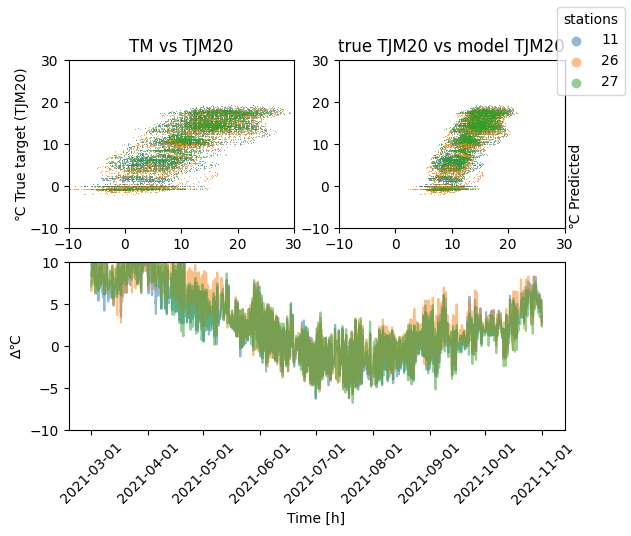

lin_stat_20 with data from stations in Trøndelag in year 2021, target TJM20


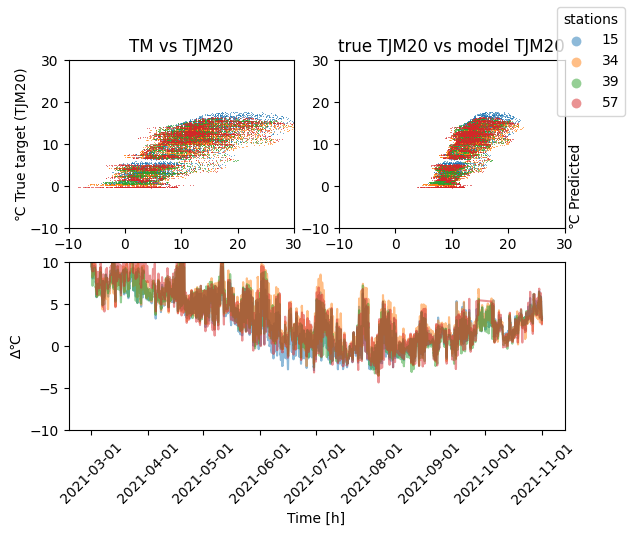

lin_stat_20 with data from stations in Østfold in year 2021, target TJM20


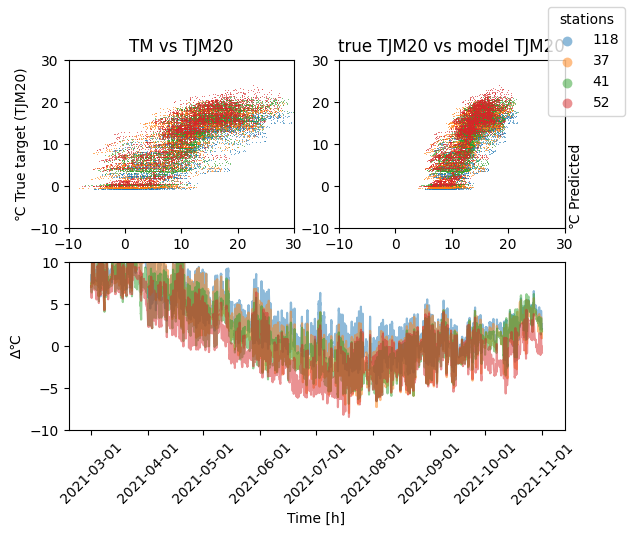

lin_stat_20 with data from stations in Vestfold in year 2021, target TJM20


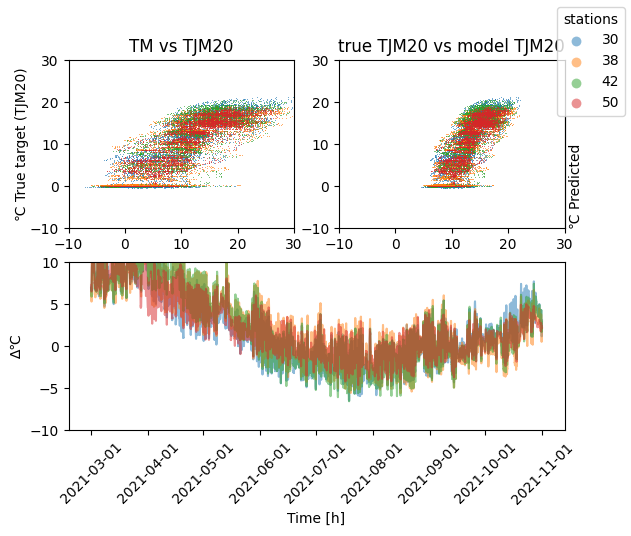

lin_stat_20 with data from stations in Innlandet in year 2022, target TJM20


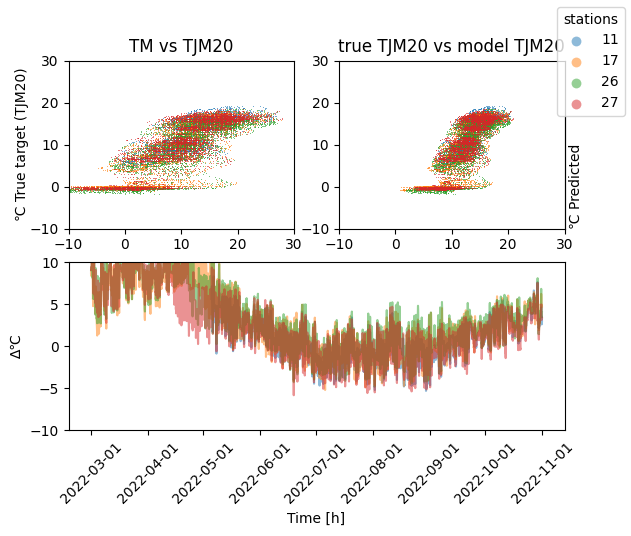

lin_stat_20 with data from stations in Trøndelag in year 2022, target TJM20


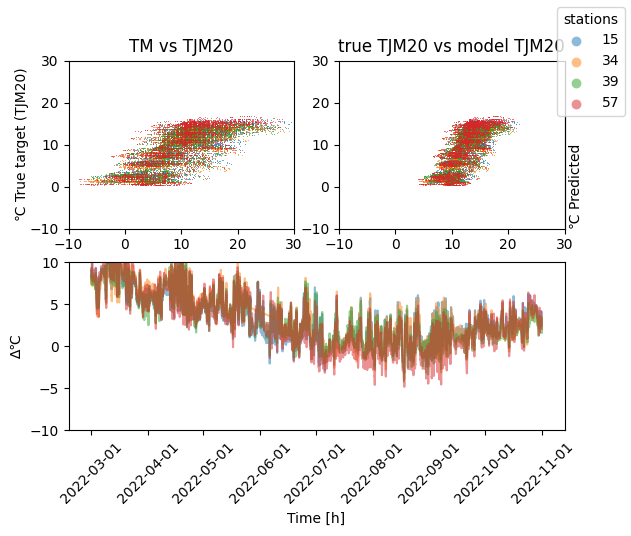

lin_stat_20 with data from stations in Østfold in year 2022, target TJM20


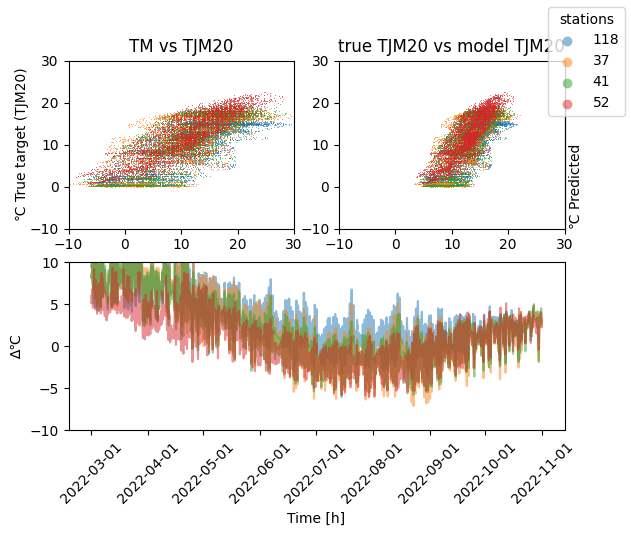

lin_stat_20 with data from stations in Vestfold in year 2022, target TJM20


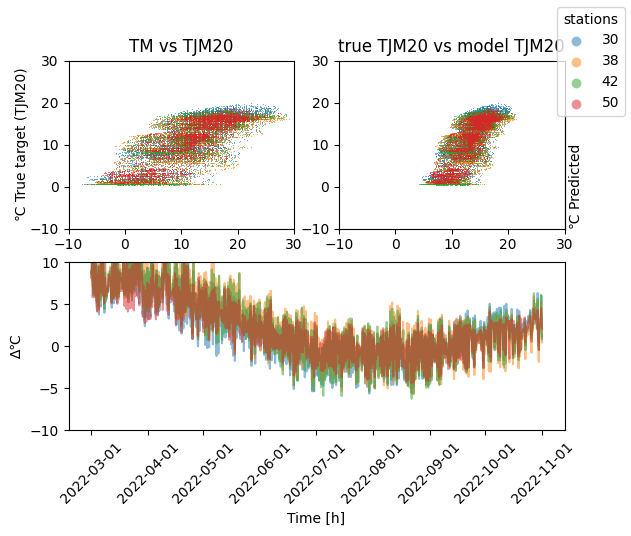

In [157]:
plot_model_performance(
    data,
    model_stat_recalc,
    feature = ["TM"],
    probing_year = "2021",
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "lin_stat_20"
)
plot_model_performance(
    data,
    model_stat_recalc,
    feature = ["TM"],
    probing_year = "2022",
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "lin_stat_20"
)

Plauborg_stat_20 with data from stations in Innlandet in year 2021, target TJM20


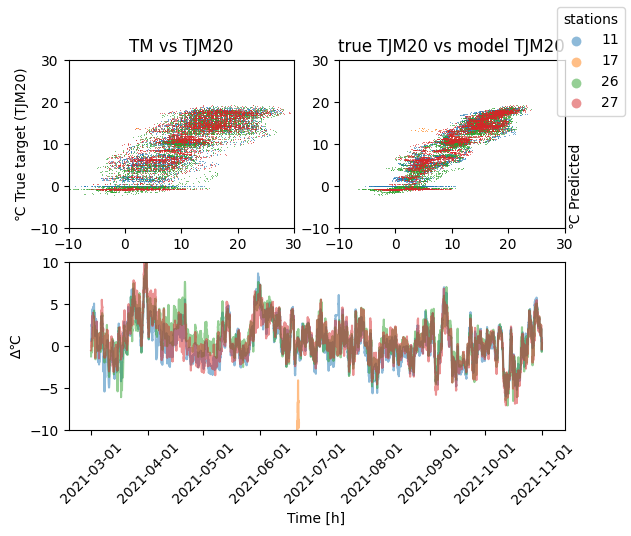

Plauborg_stat_20 with data from stations in Trøndelag in year 2021, target TJM20


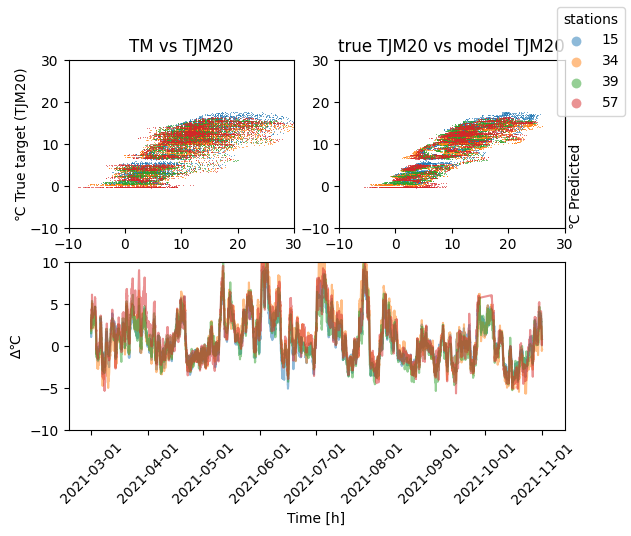

Plauborg_stat_20 with data from stations in Østfold in year 2021, target TJM20


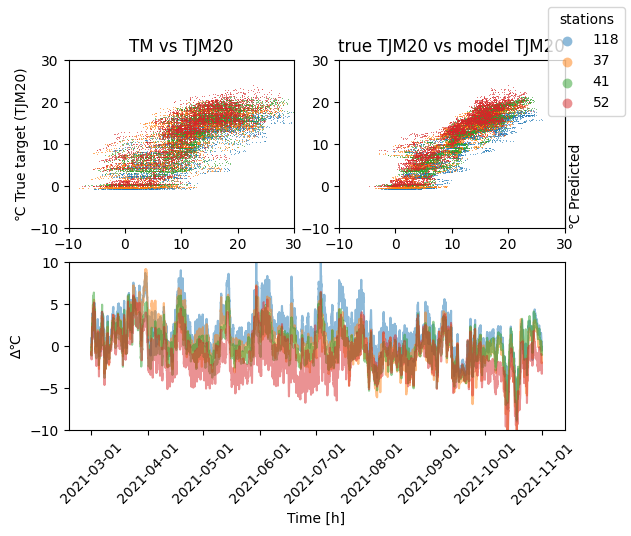

Plauborg_stat_20 with data from stations in Vestfold in year 2021, target TJM20


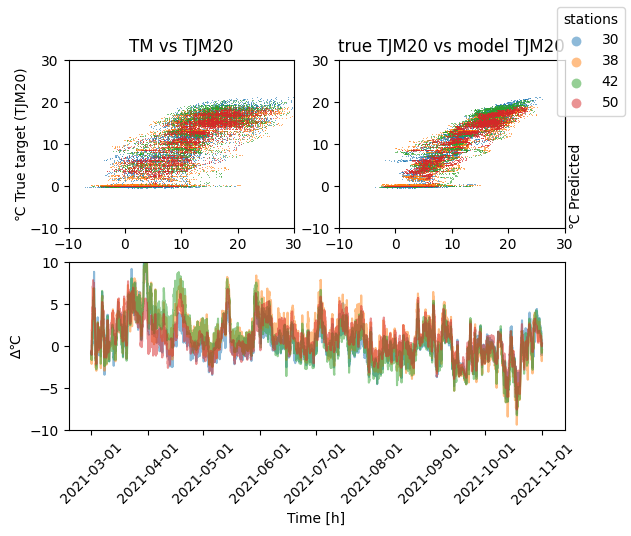

Plauborg_stat_20 with data from stations in Innlandet in year 2022, target TJM20


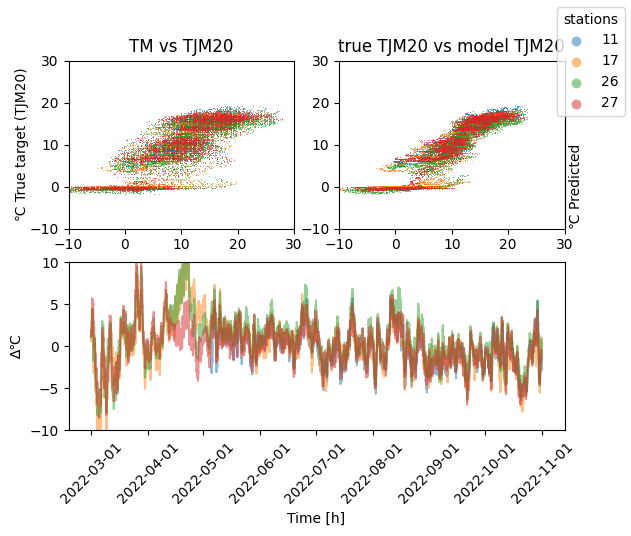

Plauborg_stat_20 with data from stations in Trøndelag in year 2022, target TJM20


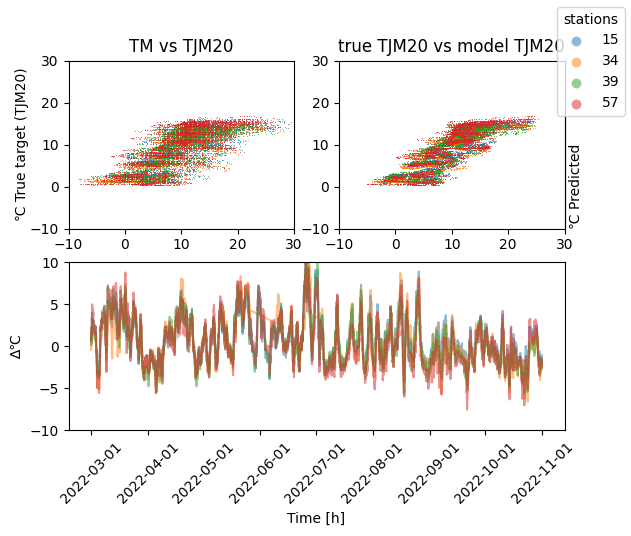

Plauborg_stat_20 with data from stations in Østfold in year 2022, target TJM20


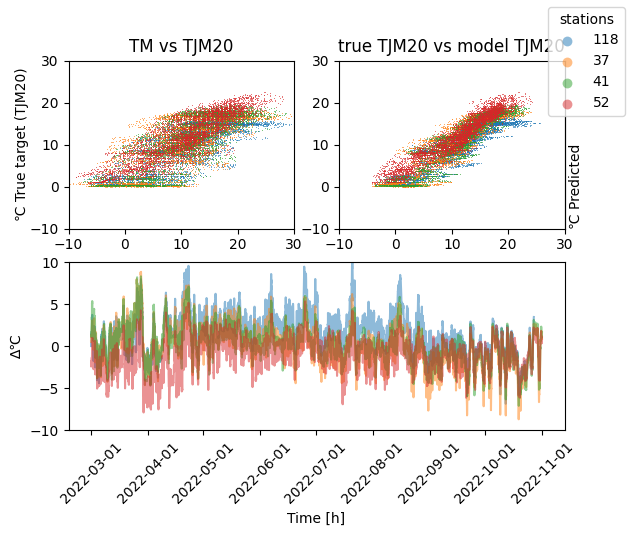

Plauborg_stat_20 with data from stations in Vestfold in year 2022, target TJM20


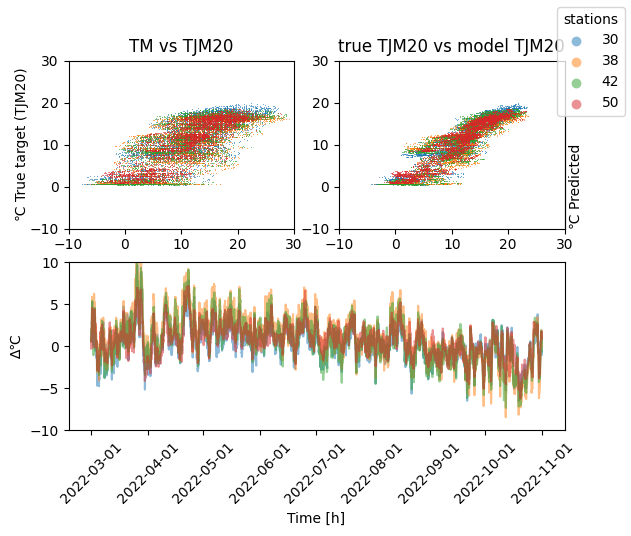

In [41]:
plot_model_performance(
    data,
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2021",
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_stat_20"
)
plot_model_performance(
    data,
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2022",
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_stat_20"
)

Plauborg_stat_10 with data from stations in Innlandet in year 2021, target TJM10


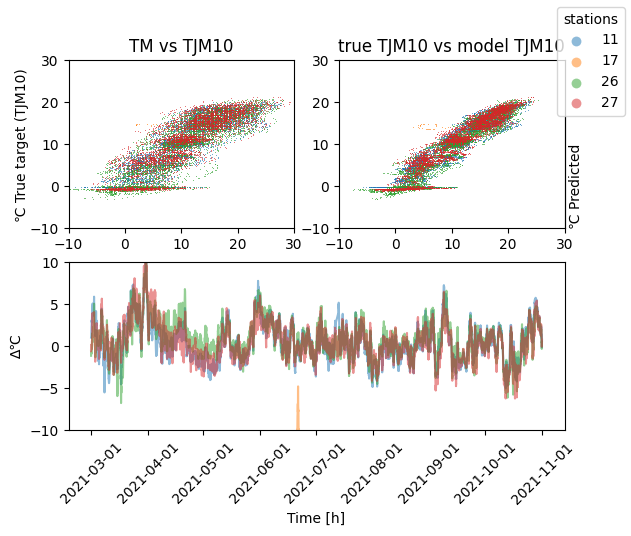

Plauborg_stat_10 with data from stations in Trøndelag in year 2021, target TJM10


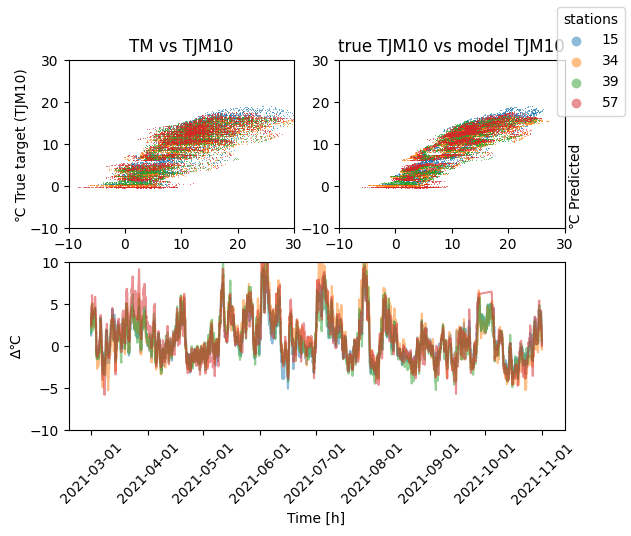

Plauborg_stat_10 with data from stations in Østfold in year 2021, target TJM10


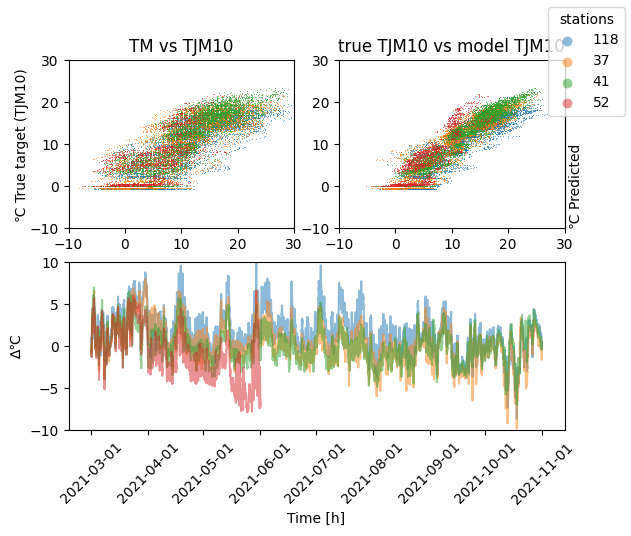

Plauborg_stat_10 with data from stations in Vestfold in year 2021, target TJM10


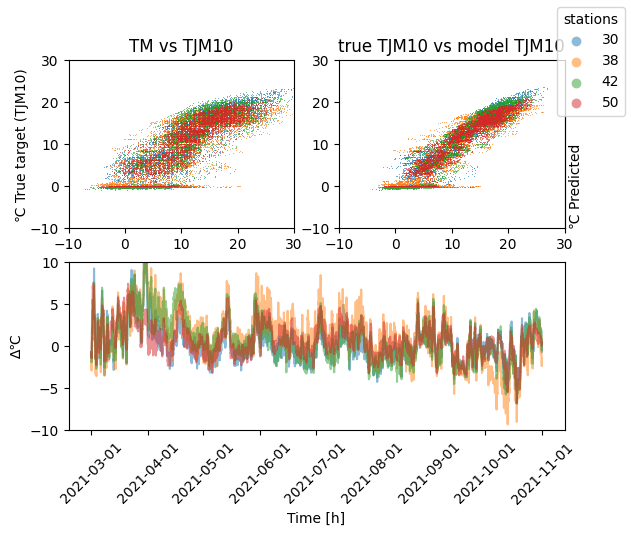

Plauborg_stat_10 with data from stations in Innlandet in year 2022, target TJM10


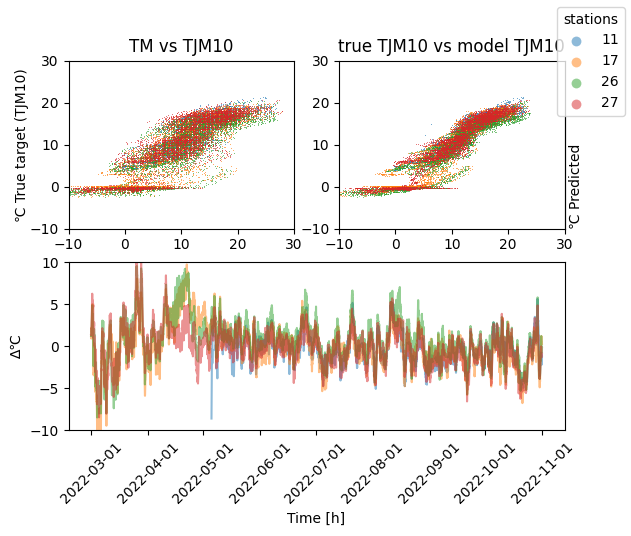

Plauborg_stat_10 with data from stations in Trøndelag in year 2022, target TJM10


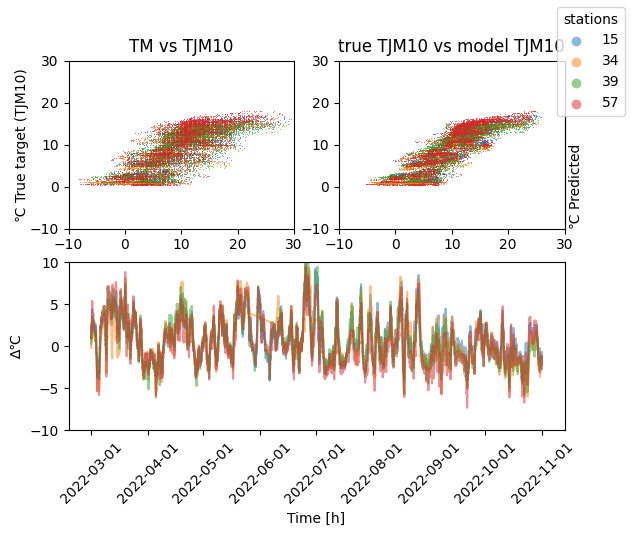

Plauborg_stat_10 with data from stations in Østfold in year 2022, target TJM10


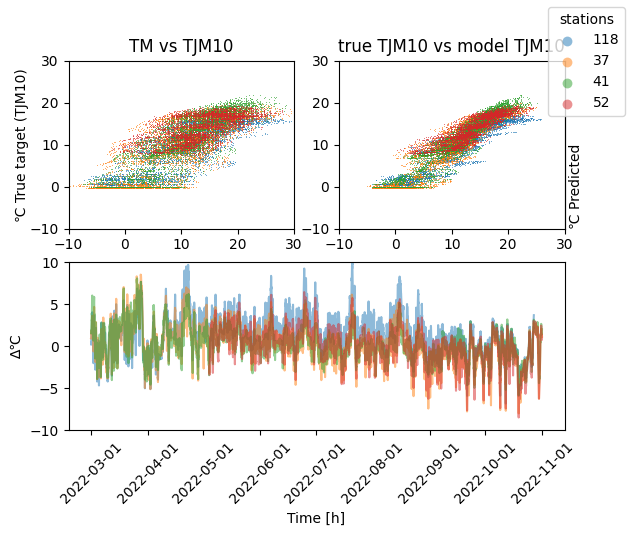

Plauborg_stat_10 with data from stations in Vestfold in year 2022, target TJM10


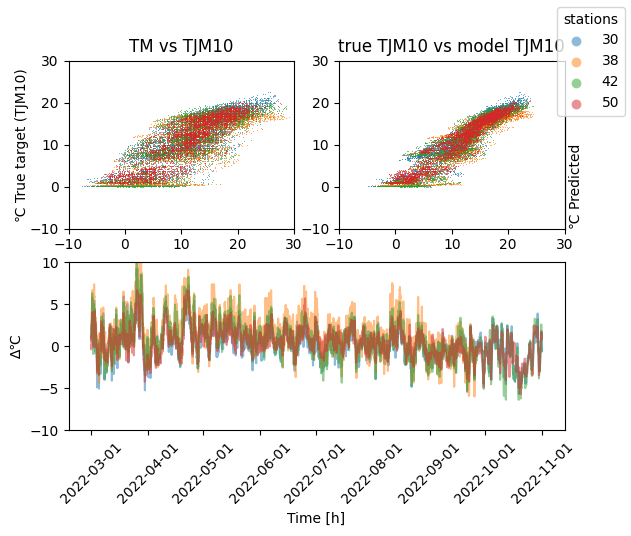

In [42]:
plot_model_performance(
    data,
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2021",
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_stat_10"
)
plot_model_performance(
    data,
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2022",
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_stat_10"
)

Plauborg_day_stat_10 with data from stations in Innlandet in year 2021, target TJM10


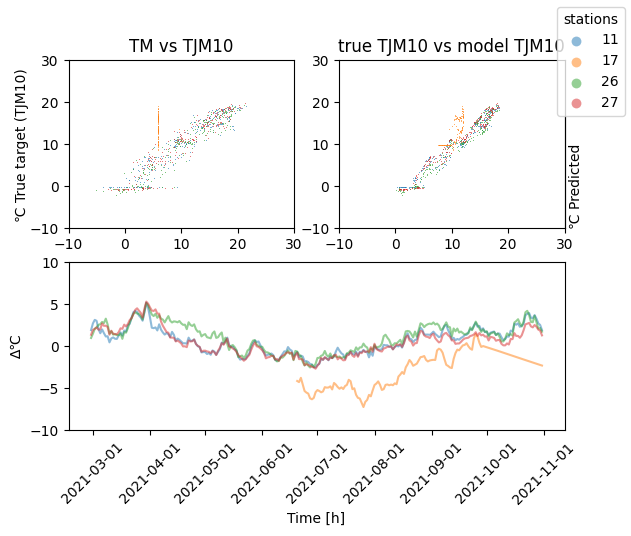

Plauborg_day_stat_10 with data from stations in Trøndelag in year 2021, target TJM10


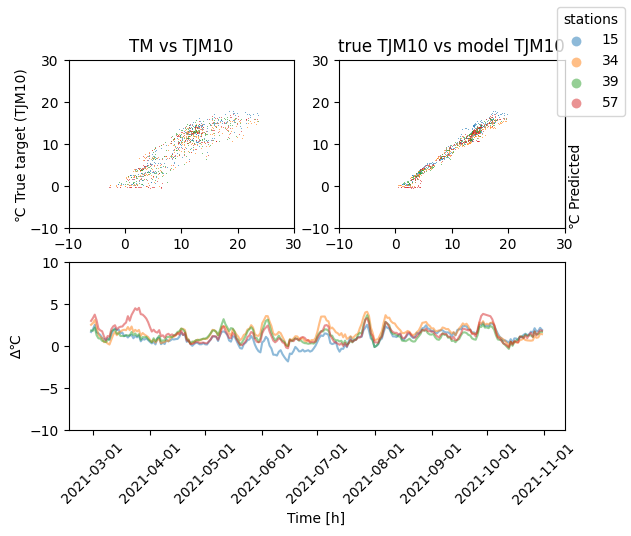

Plauborg_day_stat_10 with data from stations in Østfold in year 2021, target TJM10


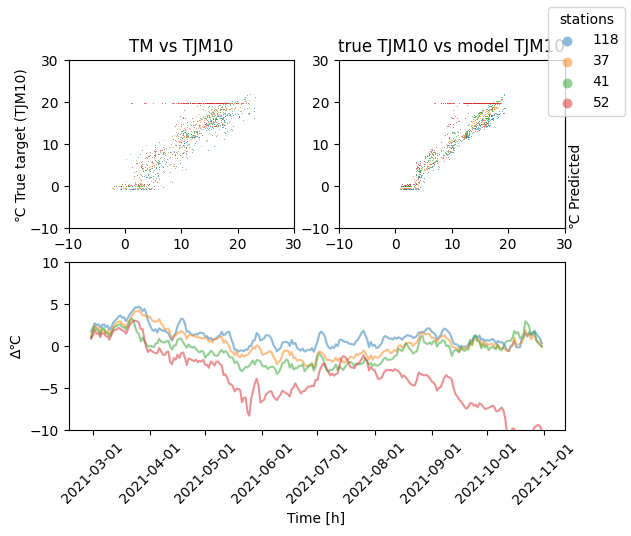

Plauborg_day_stat_10 with data from stations in Vestfold in year 2021, target TJM10


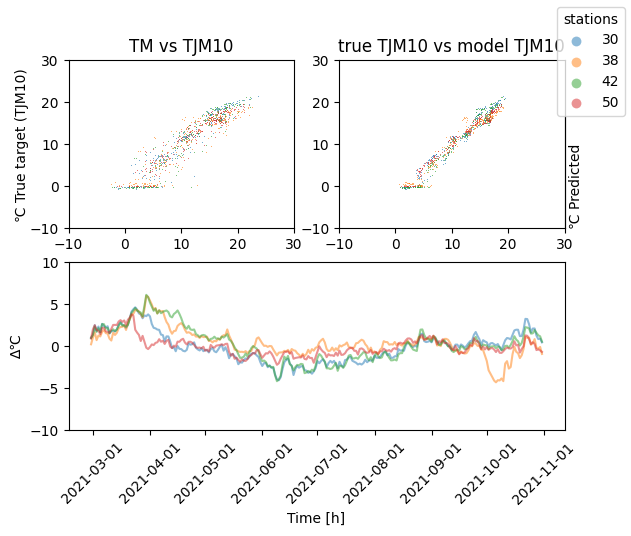

Plauborg_day_stat_10 with data from stations in Innlandet in year 2022, target TJM10


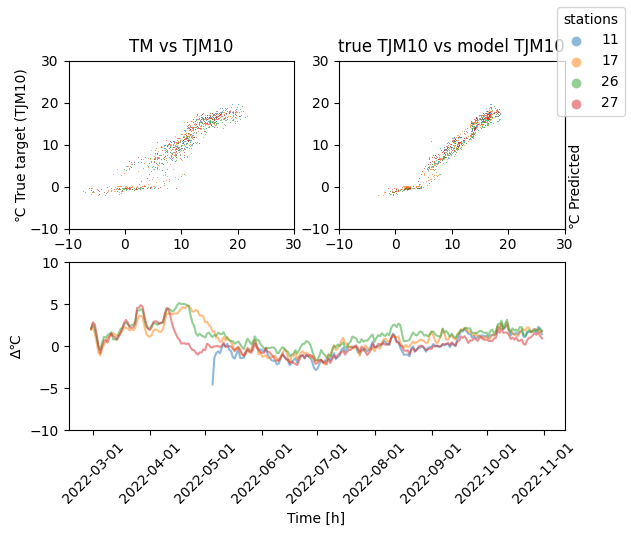

Plauborg_day_stat_10 with data from stations in Trøndelag in year 2022, target TJM10


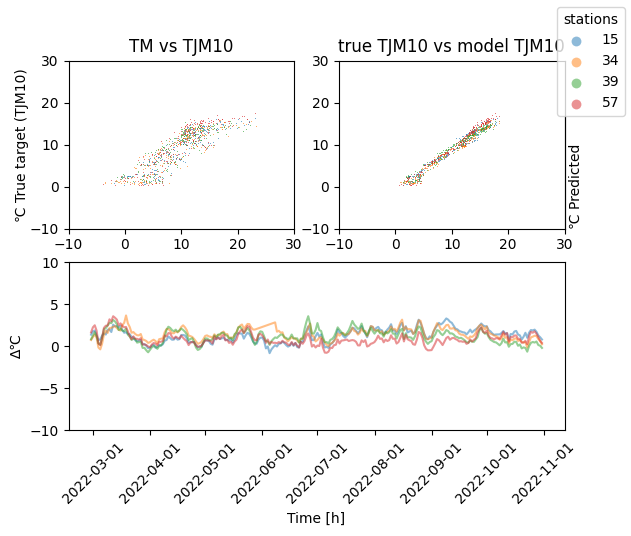

Plauborg_day_stat_10 with data from stations in Østfold in year 2022, target TJM10


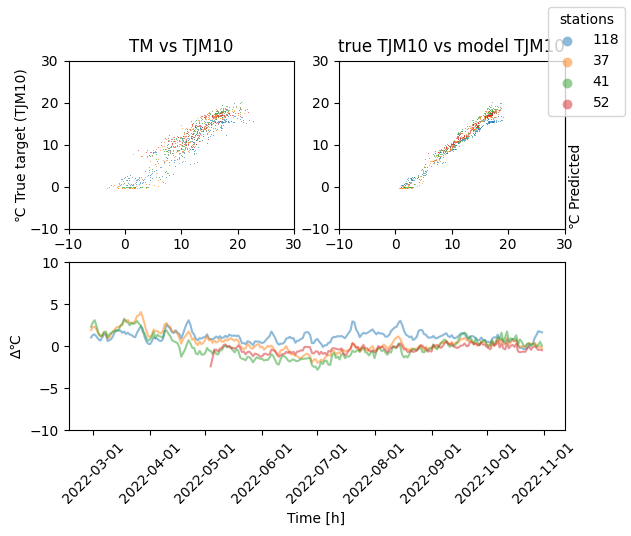

Plauborg_day_stat_10 with data from stations in Vestfold in year 2022, target TJM10


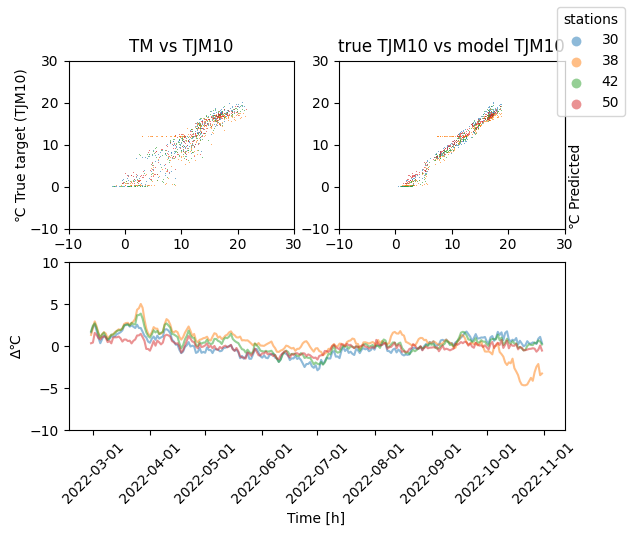

In [43]:
plot_model_performance(
    data.data_transform(hour2day),
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2021",
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_day_stat_10"
)
plot_model_performance(
    data.data_transform(hour2day),
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2022",
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_day_stat_10"
)

Plauborg_day_stat_20 with data from stations in Innlandet in year 2021, target TJM20


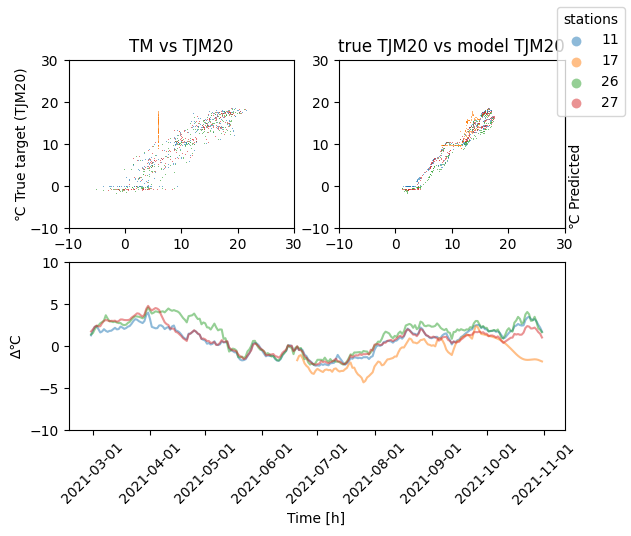

Plauborg_day_stat_20 with data from stations in Trøndelag in year 2021, target TJM20


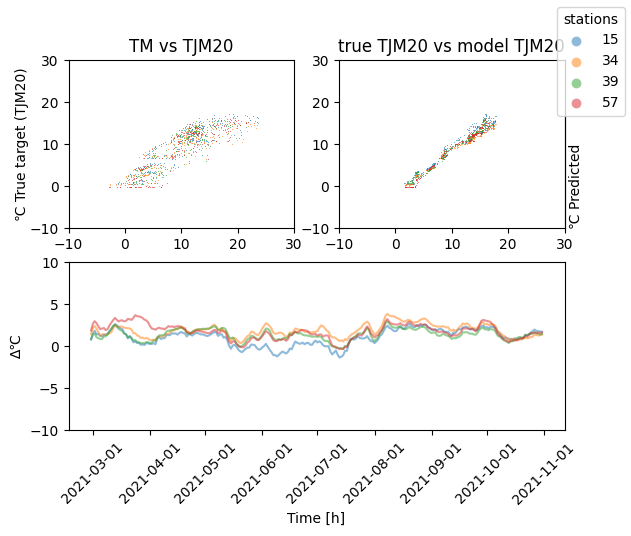

Plauborg_day_stat_20 with data from stations in Østfold in year 2021, target TJM20


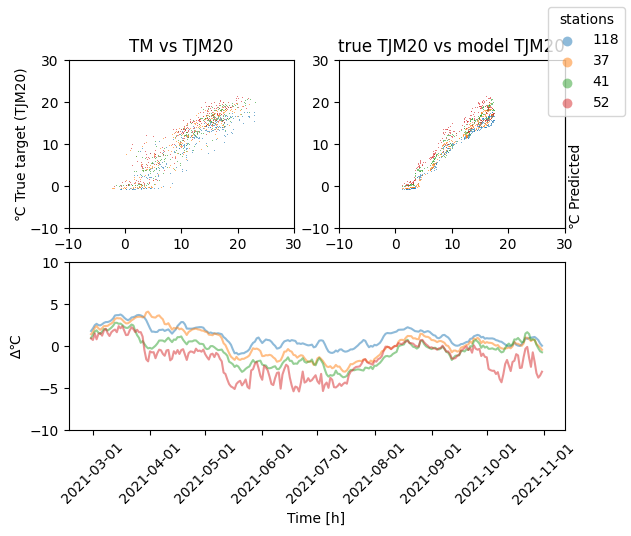

Plauborg_day_stat_20 with data from stations in Vestfold in year 2021, target TJM20


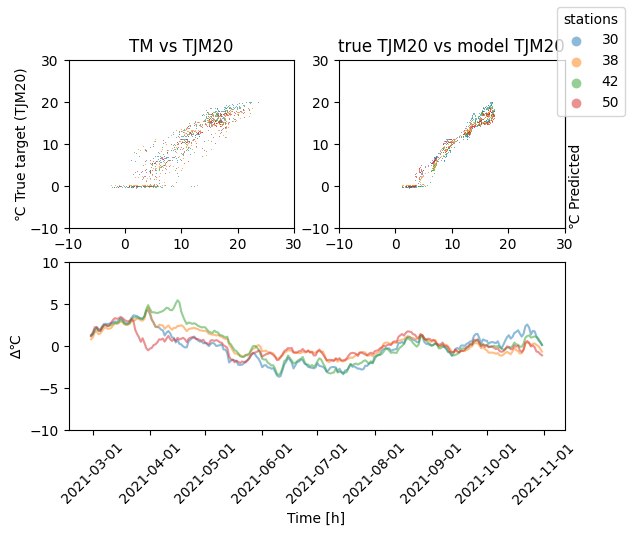

Plauborg_day_stat_20 with data from stations in Innlandet in year 2022, target TJM20


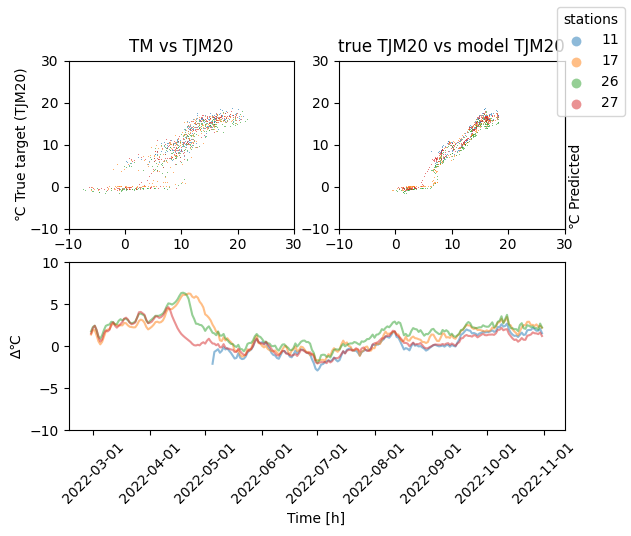

Plauborg_day_stat_20 with data from stations in Trøndelag in year 2022, target TJM20


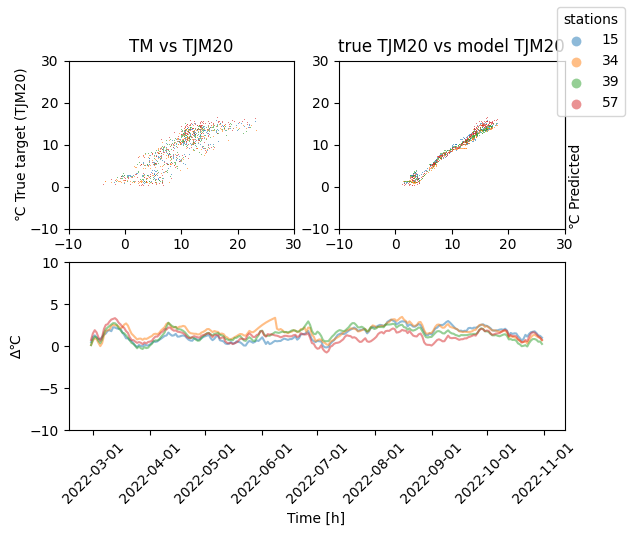

Plauborg_day_stat_20 with data from stations in Østfold in year 2022, target TJM20


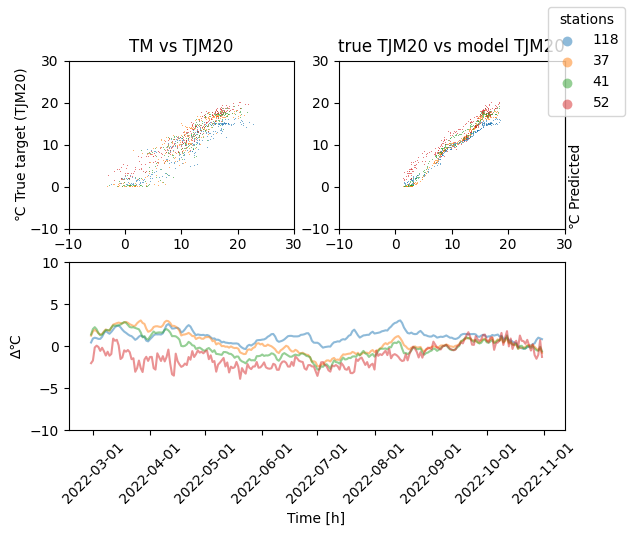

Plauborg_day_stat_20 with data from stations in Vestfold in year 2022, target TJM20


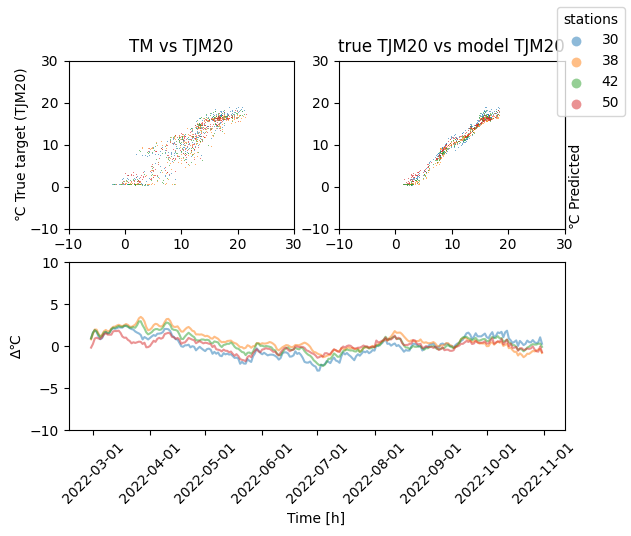

In [44]:
plot_model_performance(
    data.data_transform(hour2day),
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2021",
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_day_stat_20"
)
plot_model_performance(
    data.data_transform(hour2day),
    model_stat_recalc,
    feature = ["Time","TM"],
    probing_year = "2022",
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_day_stat_20"
)

In [19]:
from matplotlib.colors import Colormap
def plot_predground_eclipse(
    data,
    available_stat,
    feature = ["Time","TM"],
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "lin_stat_10"
):

    model2check = available_stat[name]["global"]
    fig, ax = plt.subplots()
    for i,region in enumerate(nibio_id.keys()):
        all_data = None
        for key,yr in data[region]:
            if all_data is None:
                all_data = yr.dropna(subset = ["TM","TJM10","TJM20"],how = "any")
            else:
                all_data = pd.concat([all_data, yr.dropna(subset = ["TM","TJM10","TJM20"],how = "any")],axis = 0, ignore_index=True)
        data_lin = all_data.loc[:,[*feature,target]].dropna(how="any")
        #data_time = st.loc[data_lin.index,"Time"]
        if data_lin.count().sum() <= 0:
           continue 
        y_pred = model2check["model"].predict(data_lin[feature])
        ax.scatter(x = y_pred[::25],y = data_lin[target].to_numpy()[:y_pred.shape[0]:25],
                             s = point_size,
                             linewidth=0,
                             alpha = figure_alpha,
                             label = region)
    all_data = None
    for key,yr in data:
            if all_data is None:
                all_data = yr.dropna(subset = ["TM","TJM10","TJM20"],how = "any")
            else:
                all_data = pd.concat([all_data, yr.dropna(subset = ["TM","TJM10","TJM20"],how = "any")],axis = 0, ignore_index=True)
    data_lin = all_data.loc[:,[*feature,target]].dropna(how="any")
    y_pred = model2check["model"].predict(data_lin[feature])
    for k in range(1,4):
        confidence_ellipse(y_pred, data_lin[target].to_numpy()[:y_pred.shape[0]], ax, n_std=float(k),edgecolor=["red","green","blue"][k-1],set_label = (k == 2))
    #plt.title("{} prediction accuracy with\nconfidence eclipses for 68%, 95% and 99%".format(model2name[name]))
    plt.xlim((-5,25))
    plt.ylim((-5,25))
    plt.xlabel("predicted values [℃]")
    plt.ylabel("true values [℃]")
    plt.legend(markerscale=10)
    plt.savefig(PLOT_PATH + "conf_elips_" + name + ".pdf")
    plt.show()

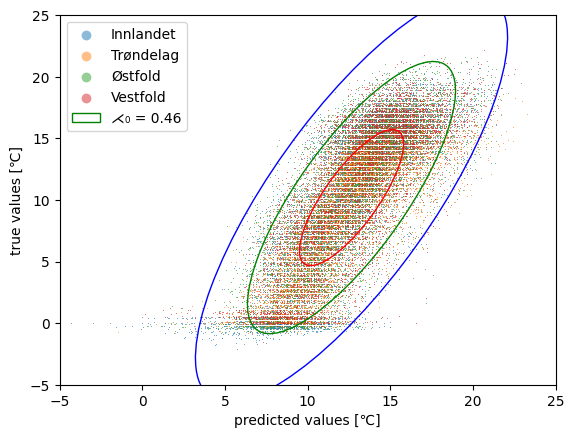

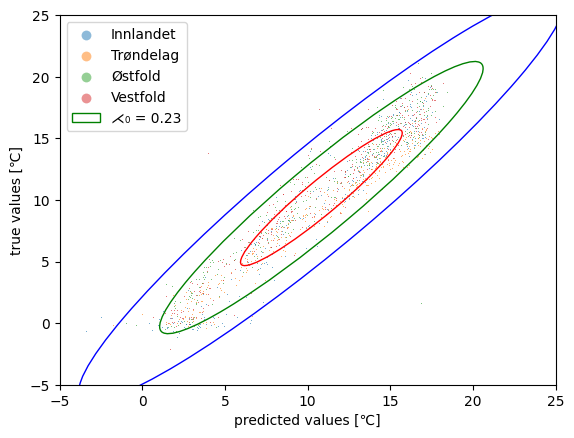

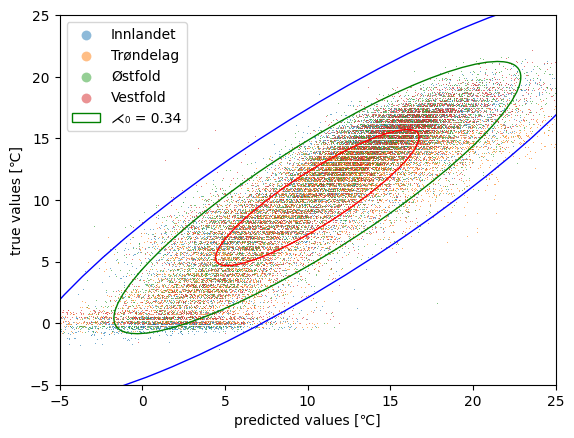

In [20]:
plot_predground_eclipse(
    data,
    model_stat_recalc,
    feature = ["TM"],
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "lin_stat_20"
)
plot_predground_eclipse(
    data.data_transform(hour2day),
    model_stat_recalc,
    feature = ["Time","TM"],
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_day_stat_20"
)
plot_predground_eclipse(
    data,
    model_stat_recalc,
    feature = ["Time","TM"],
    target = "TJM20",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_stat_20"
)
#plot_predground_eclipse(
#    data,
#    model_stat_recalc,
#    feature = ["Time","TM"],
#    target = "TJM20",
#    figure_alpha = 0.5,
#    point_size = 0.5,
#    name = "l2KerasBiLSTM_stat_20"
#)
#plot_predground_eclipse(
#    data,
#    model_stat_recalc,
#    feature = ["Time","TM"],
#    target = "TJM20",
#    figure_alpha = 0.5,
#    point_size = 0.5,
#    name = "KerasGRU_stat_20"
#)

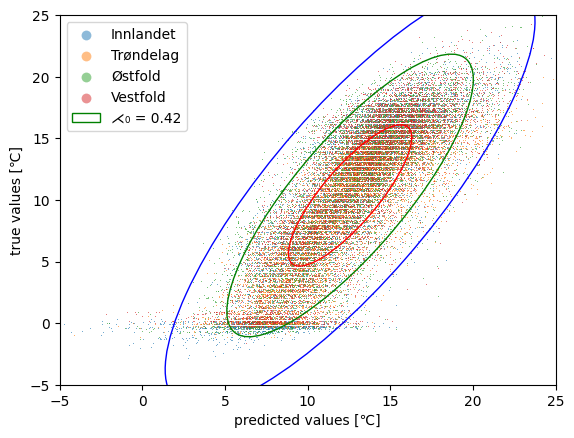

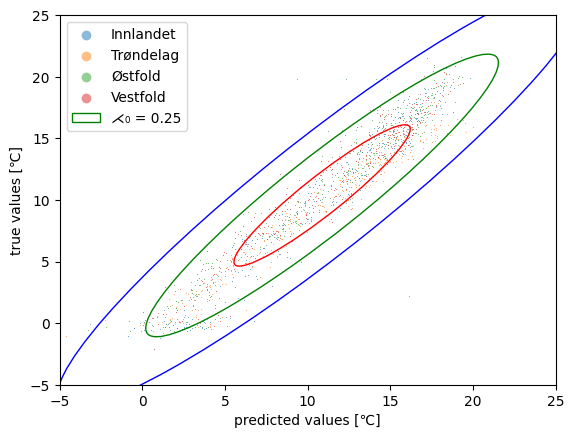

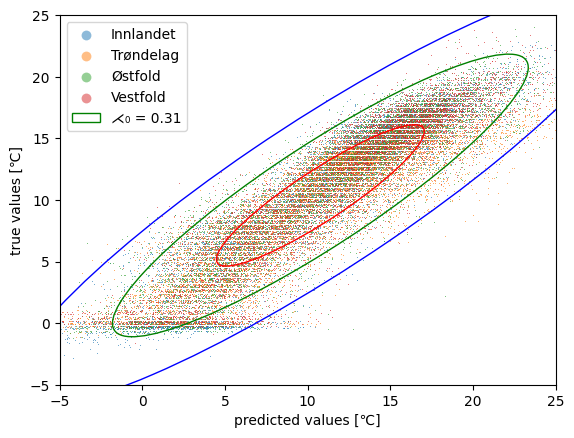

In [21]:
plot_predground_eclipse(
    data,
    model_stat_recalc,
    feature = ["TM"],
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "lin_stat_10"
)
plot_predground_eclipse(
    data.data_transform(hour2day),
    model_stat_recalc,
    feature = ["Time","TM"],
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_day_stat_10"
)
plot_predground_eclipse(
    data,
    model_stat_recalc,
    feature = ["Time","TM"],
    target = "TJM10",
    figure_alpha = 0.5,
    point_size = 0.5,
    name = "Plauborg_stat_10"
)
#plot_predground_eclipse(
#    data,
#    model_stat_recalc,
#    feature = ["Time","TM"],
#    target = "TJM10",
#    figure_alpha = 0.5,
#    point_size = 0.5,
#    name = "l2KerasBiLSTM_stat_10"
#)
#plot_predground_eclipse(
#    data,
#    model_stat_recalc,
#    feature = ["Time","TM"],
#    target = "TJM10",
#    figure_alpha = 0.5,
#    point_size = 0.5,
#    name = "KerasGRU_stat_10"
#)